# Classification of Covid patients based on their health situations

In [372]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns 
import plotly.express as px
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering, KMeans
import statistics
import scipy.cluster.hierarchy as shc
from wordcloud import WordCloud
import plotly.graph_objects as go
import ast

# Data Acquisition

We will start by uploading our dataset 

In [40]:
column_names = ['Hospital','Patient','Age','Gender','SARS-CoV-2 nucleic acids','CT','Morbidity','Mortality','Body temperature','Underlying diseases']
# load dataset
dataset = pd.read_csv("/Users/ameny/Documents/CS434 Data Analytics/CovidProject/iCTCF.csv", header=None, names=column_names)
# view dataset
dataset.head()

,Hospital,Patient,Age,Gender,SARS-CoV-2 nucleic acids,CT,Morbidity,Mortality,Body temperature,Underlying diseases
0,HUST-Union Hospital,Patient 1,81,Male,Positive,Positive,Regular,Cured,36.6°C,"Hypertension, Thyroidectomy"
1,HUST-Union Hospital,Patient 2,50,Male,Positive,Positive,Regular,Cured,38.7°C,No underlying disease
2,HUST-Union Hospital,Patient 3,65,Female,Positive,Positive,Regular,Cured,38.5°C,Postoperative cervical cancer
3,HUST-Union Hospital,Patient 4,73,Male,Positive,Positive,Severe,Cured,38.5°C,Aorta calcification
4,HUST-Union Hospital,Patient 5,64,Female,Positive,Positive,Severe,Cured,38.0°C,No underlying disease


Dataset2 has body temperatures as floats instead of strings

In [41]:
column2_names = ['Patient','Age','Gender','SARS-CoV-2 nucleic acids','CT','Body temperature','Underlying diseases']
# load dataset
dataset2 = pd.read_csv("/Users/ameny/Documents/CS434 Data Analytics/CovidProject/iCTCF_version2.csv", header=None, names=column2_names)
# view dataset
dataset2.head()

,Patient,Age,Gender,SARS-CoV-2 nucleic acids,CT,Body temperature,Underlying diseases
0,Patient 1,81,Male,Positive,Positive,36.6,"Hypertension, Thyroidectomy"
1,Patient 10,53,Female,Positive,Positive,36.2,Cholecystectomy
2,Patient 100,53,Female,Positive,NaN,36.6,Multiple myeloma
3,Patient 1000,27,Male,Negative,Negative,NaN,No underlying disease
4,Patient 1001,26,Female,Negative,Negative,NaN,No underlying disease


In [104]:
column3_names = ['Patient','Age','Gender','SARS-CoV-2 nucleic acids','CT','Body temperature','Underlying diseases']
# load dataset
dataset3 = pd.read_csv("/Users/ameny/Documents/CS434 Data Analytics/CovidProject/iCTCF_version3.csv", header=None, names=column3_names)
# view dataset
dataset3.head()

,Patient,Age,Gender,SARS-CoV-2 nucleic acids,CT,Body temperature,Underlying diseases
0,864,40,Male,Positive,Positive,38.0,"Abnormal liver function, Hypertension, Diabete..."
1,98,35,Female,Positive,Positive,36.2,Acute lymphoblastic leukemia
2,1419,69,Male,Negative,Negative,39.0,Acute myeloid leukemia
3,1423,32,Female,Negative,Negative,38.0,Acute myeloid leukemia
4,1430,24,Male,Negative,Negative,40.0,Acute myeloid leukemia


# Data Visualisation

As a first step in our descriptive analysis, we will try to perform several simple graphical vizualization of our data to understand our dataset main features such as age distribution, mortality distribution, etc...

## Gender Distribution

0         Male
1         Male
2       Female
3         Male
4       Female
         ...  
1516    Female
1517    Female
1518    Female
1519    Female
1520    Female
Name: Gender, Length: 1521, dtype: object
Total of Female : 765
Total of Male : 756


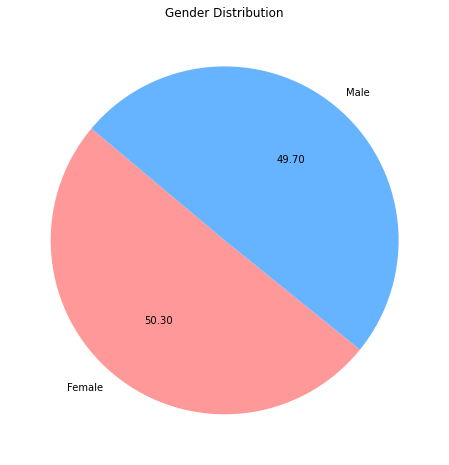

In [42]:
#count gender of patients
gender_list=dataset['Gender']
print(gender_list)
gender_list.value_counts()

female = gender_list.loc[dataset['Gender'] == 'Female'].count()
print('Total of Female :',female)
male = gender_list.loc[dataset['Gender'] == 'Male'].count()
print('Total of Male :',male)
labels=['Female','Male']
colors=['#ff9999','#66b3ff']
plt.figure(facecolor='white',figsize=(8,8))
piedata=np.array([female,male])
plt.pie(x=piedata,labels=labels,colors=colors, startangle=140, autopct='%.2f')
plt.title('Gender Distribution')
plt.show()


## Age distribution

0       81
1       50
2       65
3       73
4       64
        ..
1516    45
1517    66
1518    71
1519    66
1520    64
Name: Age, Length: 1521, dtype: int64
The average age of the dataset is 55
The most common age is [65]
The quantiles of the patientsage are [42.0, 57.0, 67.0]
14
19
112
219
192
320
387
163
77


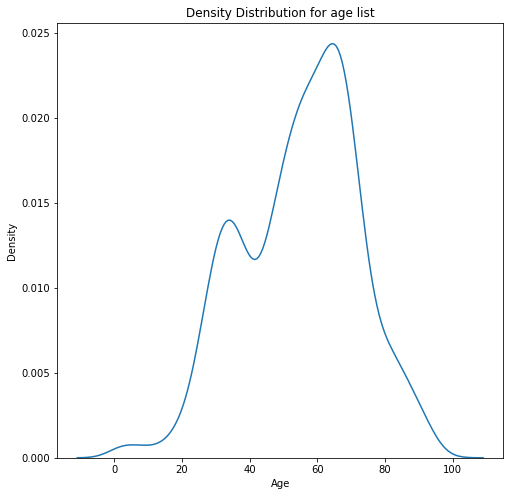

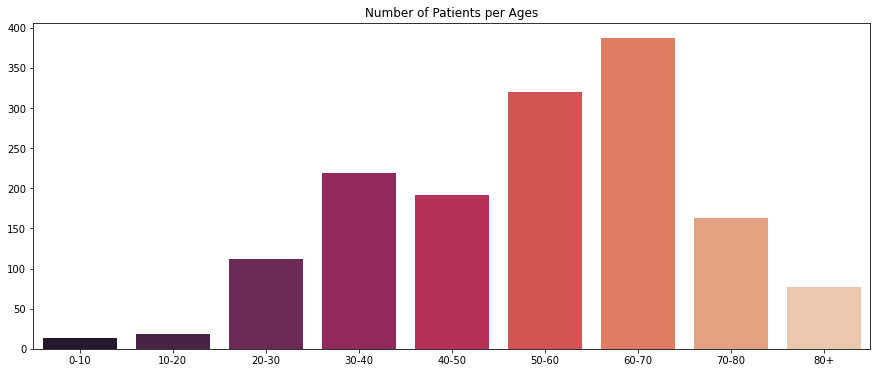

In [433]:
#Descriptive analysis for ages
age_list=dataset['Age']
print(age_list)
average=statistics.mean(age_list)
print('The average age of the dataset is',round(average))

most_common=statistics.multimode(age_list)
print('The most common age is',most_common)

age_quantiles=statistics.quantiles(age_list)
print('The quantiles of the patients''age are',age_quantiles)

plt.figure(facecolor='white',figsize=(8,8))
plt.title('Density Distribution for age list')
sns.kdeplot(dataset['Age'])


age1_10 = age_list[(age_list <= 10) & (age_list >= 1)]
a1=age1_10.count()
print(a1)
age11_20 = age_list[(age_list <= 20) & (age_list >= 11)]
a2=age11_20.count()
print(a2)
age21_30 = age_list[(age_list <= 30) & (age_list >= 21)]
a3=age21_30.count()
print(a3)
age31_40 = age_list[(age_list <= 40) & (age_list >= 31)]
a4=age31_40.count()
print(a4)
age41_50 = age_list[(age_list <= 50) & (age_list >= 41)]
a5=age41_50.count()
print(a5)
age51_60 = age_list[(age_list <= 60) & (age_list >= 51)]
a6=age51_60.count()
print(a6)
age61_70 = age_list[(age_list <= 70) & (age_list >= 61)]
a7=age61_70.count()
print(a7)
age71_80 = age_list[(age_list <= 80) & (age_list >= 71)]
a8=age71_80.count()
print(a8)
age81_90 = age_list[(age_list <= 90) & (age_list >= 81)]
a9=age81_90.count()
print(a9)

x = ["0-10","10-20","20-30", "30-40", "40-50","50-60","60-70","70-80","80+"]
y = [len(age1_10.values),len(age11_20.values),len(age21_30.values),len(age31_40.values),len(age41_50.values),len(age51_60.values),len(age61_70.values),len(age71_80.values),len(age81_90.values)]
plt.figure(figsize=(15,6)).savefig("ranges.png")
sns.barplot(x=x, y=y, palette="rocket")

plt.savefig('ranges.png')
plt.title("Number of Patients per Ages")
plt.show()

## SARS-CoV-2 nucleic acids distribution

0       Positive
1       Positive
2       Positive
3       Positive
4       Positive
          ...   
1516    Positive
1517    Positive
1518    Positive
1519    Positive
1520    Positive
Name: SARS-CoV-2 nucleic acids, Length: 1521, dtype: object
Total of positive cases : 894
Total of negative cases : 627


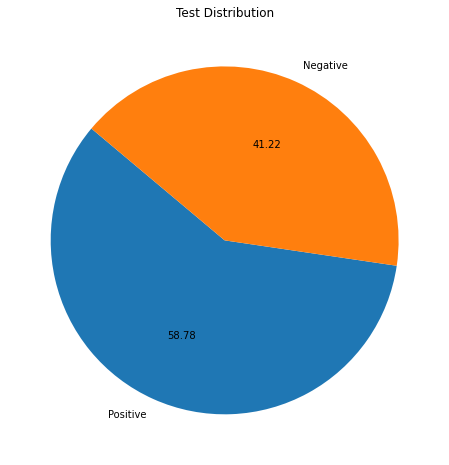

In [426]:
test_list=dataset['SARS-CoV-2 nucleic acids']
print(test_list)
positive = test_list.loc[dataset['SARS-CoV-2 nucleic acids'] == 'Positive'].count()
print('Total of positive cases :',positive)
negative = mortality_list.loc[dataset['SARS-CoV-2 nucleic acids'] == 'Negative'].count()
print('Total of negative cases :',negative)

labels=['Positive','Negative']
plt.figure(facecolor='white',figsize=(8,8))
piedata=np.array([positive,negative])
plt.pie(x=piedata,labels=labels, startangle=140, autopct='%.2f')
plt.title('Test Distribution')
plt.show()

## Mortality Distribution

0         Cured
1         Cured
2         Cured
3         Cured
4         Cured
         ...   
1516    Unknown
1517    Unknown
1518      Cured
1519      Cured
1520      Cured
Name: Mortality, Length: 1521, dtype: object
Total of cured cases : 662
Total of deceased cases : 57
Total of unknown cases : 802


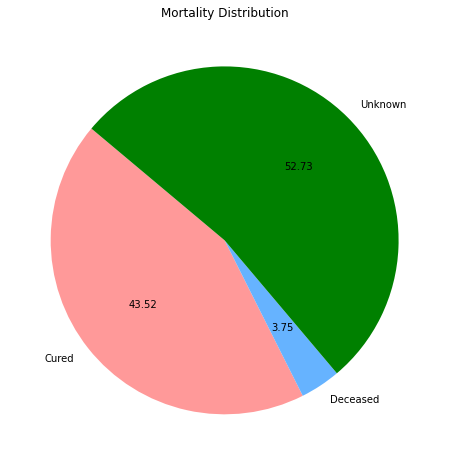

In [44]:
#Visualize mortality
mortality_list=dataset['Mortality']
print(mortality_list)
mortality_list.value_counts()

cured = mortality_list.loc[dataset['Mortality'] == 'Cured'].count()
print('Total of cured cases :',cured)
deceased = mortality_list.loc[dataset['Mortality'] == 'Deceased'].count()
print('Total of deceased cases :',deceased)
unknown = mortality_list.loc[dataset['Mortality'] == 'Unknown'].count()
print('Total of unknown cases :',unknown)
labels=['Cured','Deceased','Unknown']
colors=['#ff9999','#66b3ff','green']
plt.figure(facecolor='white',figsize=(8,8))
piedata=np.array([cured,deceased,unknown])
plt.pie(x=piedata,labels=labels,colors=colors, startangle=140, autopct='%.2f')
plt.title('Mortality Distribution')
plt.show()

## Correlation between positive SARS-CoV-2 nucleic acids and mortality

0       Cured
1       Cured
2       Cured
3       Cured
4       Cured
        ...  
1516    Cured
1517    Cured
1518    Cured
1519    Cured
1520    Cured
Name: Mortality, Length: 1521, dtype: object
Total of cured cases : 788
Total of deceased cases : 57
Total of unknown cases : 676
0       Positive
1       Positive
2       Positive
3       Positive
4       Positive
          ...   
1516    Positive
1517    Positive
1518    Positive
1519    Positive
1520    Positive
Name: SARS-CoV-2 nucleic acids, Length: 1521, dtype: object
Total of positive cases : 894
Total of negative cases : 627
          Negative  Positive
Cured            0       788
Deceased         0        57
Unknown        627        49


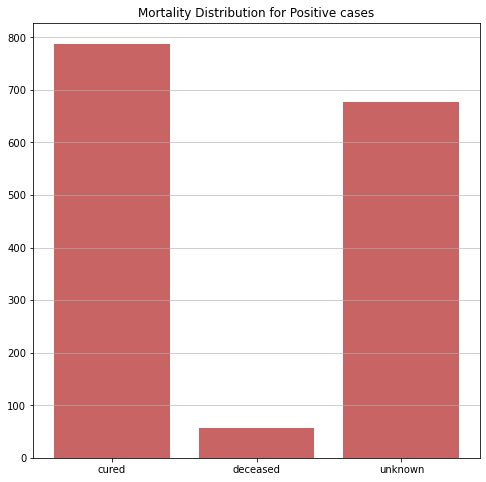

In [292]:
#Correlation between positive SARS-CoV-2 nucleic acids and mortality
mortality_list=dataset['Mortality']
print(mortality_list)
cured = mortality_list.loc[dataset['Mortality'] == 'Cured'].count()
print('Total of cured cases :',cured)
deceased = mortality_list.loc[dataset['Mortality'] == 'Deceased'].count()
print('Total of deceased cases :',deceased)
unknown = mortality_list.loc[dataset['Mortality'] == 'Unknown'].count()
print('Total of unknown cases :',unknown)

test_list=dataset['SARS-CoV-2 nucleic acids']
print(test_list)
positive = test_list.loc[dataset['SARS-CoV-2 nucleic acids'] == 'Positive'].count()
print('Total of positive cases :',positive)
negative = test_list.loc[dataset['SARS-CoV-2 nucleic acids'] == 'Negative'].count()
print('Total of negative cases :',negative)

joint_matrix = pd.crosstab(mortality_list, test_list)
joint_matrix.columns.name = None
joint_matrix = joint_matrix.rename_axis(None)
print (joint_matrix)

mortality_names=['cured','deceased','unknown']
plt.figure(facecolor='white',figsize=(8,8))
bar=plt.bar(mortality_names,height=[cured,deceased,unknown], color='firebrick', alpha=0.7, linewidth=10)
plt.grid(axis='y', alpha=0.75)
plt.title('Mortality Distribution for Positive cases')
plt.show()

## Gender Vs SARS-CoV-2 nucleic acids tests

0         Male
1         Male
2       Female
3         Male
4       Female
         ...  
1516    Female
1517    Female
1518    Female
1519    Female
1520    Female
Name: Gender, Length: 1521, dtype: object
Total of Female : 765
Total of Male : 756
0       Positive
1       Positive
2       Positive
3       Positive
4       Positive
          ...   
1516    Positive
1517    Positive
1518    Positive
1519    Positive
1520    Positive
Name: SARS-CoV-2 nucleic acids, Length: 1521, dtype: object
Total of positive cases : 894
Total of negative cases : 627
SARS-CoV-2 nucleic acids  Negative  Positive
Gender                                      
Female                         280       485
Male                           347       409


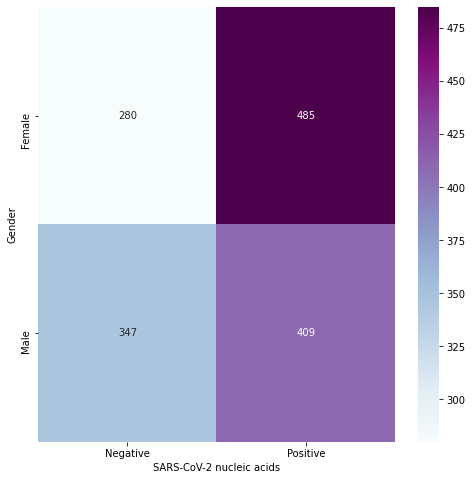

In [438]:
gender_list=dataset['Gender']
print(gender_list)
gender_list.value_counts()
female = gender_list.loc[dataset['Gender'] == 'Female'].count()
print('Total of Female :',female)
male = gender_list.loc[dataset['Gender'] == 'Male'].count()
print('Total of Male :',male)


test_list=dataset['SARS-CoV-2 nucleic acids']
print(test_list)
positive = test_list.loc[dataset['SARS-CoV-2 nucleic acids'] == 'Positive'].count()
print('Total of positive cases :',positive)
negative = mortality_list.loc[dataset['SARS-CoV-2 nucleic acids'] == 'Negative'].count()
print('Total of negative cases :',negative)

joint_matrix2 = pd.crosstab(gender_list, test_list)
print (joint_matrix2)

plt.figure(facecolor='white',figsize=(8,8))
sns.heatmap(joint_matrix2, annot=True, fmt='g',cmap="BuPu")
plt.savefig('gender_tests.png')
plt.show()

From the previous heatmap, we may deduce that gender does not affect the likelihood of having positive SARS-CoV-2 nucleic acids since females with positive tests are 485 and males with positive tests are 429 while keeping in mind that our dataset has 765 females and 756 males

## Correlation between mortality and morbidity

0       Cured
1       Cured
2       Cured
3       Cured
4       Cured
        ...  
1516    Cured
1517    Cured
1518    Cured
1519    Cured
1520    Cured
Name: Mortality, Length: 1521, dtype: object
Total of cured cases : 788
Total of deceased cases : 57
Total of unknown cases : 676
0       Regular
1       Regular
2       Regular
3        Severe
4        Severe
         ...   
1516    Regular
1517    Regular
1518    Regular
1519    Regular
1520    Regular
Name: Morbidity, Length: 1521, dtype: object
Total of regular cases : 596
Total of severe cases : 202
Total of critically ill cases : 72
Total of mild cases: 24
Total of control cases: 328
Total of suspected cases: 299
          Control  Critically ill  Mild  Regular  Severe  Suspected
Cured           0              13    24      596     155          0
Deceased        0              42     0        0      15          0
Unknown       328              17     0        0      32        299


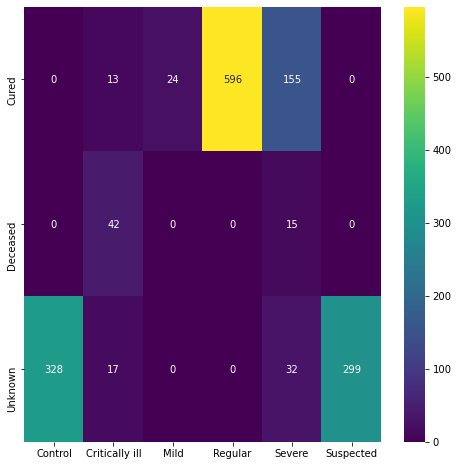

In [439]:
#Correlation between mortality and morbidity
mortality_list=dataset['Mortality']
print(mortality_list)
cured = mortality_list.loc[dataset['Mortality'] == 'Cured'].count()
print('Total of cured cases :',cured)
deceased = mortality_list.loc[dataset['Mortality'] == 'Deceased'].count()
print('Total of deceased cases :',deceased)
unknown = mortality_list.loc[dataset['Mortality'] == 'Unknown'].count()
print('Total of unknown cases :',unknown)

morbidity_list=dataset['Morbidity']
print(morbidity_list)
regular = morbidity_list.loc[dataset['Morbidity'] == 'Regular'].count()
print('Total of regular cases :',regular)
severe = morbidity_list.loc[dataset['Morbidity'] == 'Severe'].count()
print('Total of severe cases :',severe)
critically_ill = morbidity_list.loc[dataset['Morbidity'] == 'Critically ill'].count()
print('Total of critically ill cases :',critically_ill)
mild = morbidity_list.loc[dataset['Morbidity'] == 'Mild'].count()
print('Total of mild cases:',mild)
control = morbidity_list.loc[dataset['Morbidity'] == 'Control'].count()
print('Total of control cases:',control)
suspected = morbidity_list.loc[dataset['Morbidity'] == 'Suspected'].count()
print('Total of suspected cases:',suspected)

joint_matrix = pd.crosstab(mortality_list, morbidity_list)
joint_matrix.columns.name = None
joint_matrix = joint_matrix.rename_axis(None)
print (joint_matrix)

plt.figure(facecolor='white',figsize=(8,8))
sns.heatmap(joint_matrix, annot=True, fmt='g',cmap='viridis')
plt.savefig('mortality_morbidity.png')
plt.show()



From this heatmap, we see that the regular cases have the highest score (475 cases) and we have 121 cases that are regular while their mortality situation is unknown. we may then assume that these unkown have cured. 

The total of the Mild cases is 24 where 19 are cured while 5 are unkonwn therefore we can assume that those 5 cases are cured. 

In [294]:
for index in dataset.index:
    if dataset.loc[index,'Morbidity'] == 'Mild':
        dataset.loc[index,'Mortality'] = 'Cured'
    if dataset.loc[index,'Morbidity'] =='Regular':
        dataset.loc[index,'Mortality'] = 'Cured'
dataset.head()

,Hospital,Patient,Age,Gender,SARS-CoV-2 nucleic acids,CT,Morbidity,Mortality,Body temperature,Underlying diseases,No illness,Cardiovascular Diseases,Oncological Disorders,Neurological Disorders,Thorasic Disorders
0,HUST-Union Hospital,Patient 1,81,Male,Positive,Positive,Regular,Cured,36.6°C,"Hypertension, Thyroidectomy",False,False,False,False,False
1,HUST-Union Hospital,Patient 2,50,Male,Positive,Positive,Regular,Cured,38.7°C,No underlying disease,True,False,False,False,False
2,HUST-Union Hospital,Patient 3,65,Female,Positive,Positive,Regular,Cured,38.5°C,Postoperative cervical cancer,False,False,True,False,False
3,HUST-Union Hospital,Patient 4,73,Male,Positive,Positive,Severe,Cured,38.5°C,Aorta calcification,False,True,False,False,False
4,HUST-Union Hospital,Patient 5,64,Female,Positive,Positive,Severe,Cured,38.0°C,No underlying disease,True,False,False,False,False


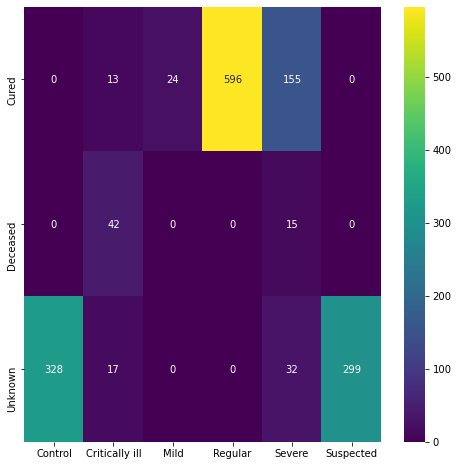

In [297]:
#Visualize the changes applied from above
plt.figure(facecolor='white',figsize=(8,8))
sns.heatmap(joint_matrix, annot=True, fmt='g',cmap='viridis')
plt.show()


## SARS-CoV-2 nucleic acids and CT 

0       Positive
1       Positive
2       Positive
3       Positive
4       Positive
          ...   
1516    Positive
1517    Positive
1518    Positive
1519    Positive
1520    Positive
Name: SARS-CoV-2 nucleic acids, Length: 1521, dtype: object
Total of positive cases : 894
Total of negative cases : 627
0       Positive
1       Positive
2       Positive
3       Positive
4       Positive
          ...   
1516    Positive
1517    Positive
1518    Positive
1519    Positive
1520    Positive
Name: SARS-CoV-2 nucleic acids, Length: 1521, dtype: object
Total of positive cases : 1006
Total of negative cases : 336
SARS-CoV-2 nucleic acids  Negative  Positive
CT                                          
Negative                       314        22
Positive                       259       747


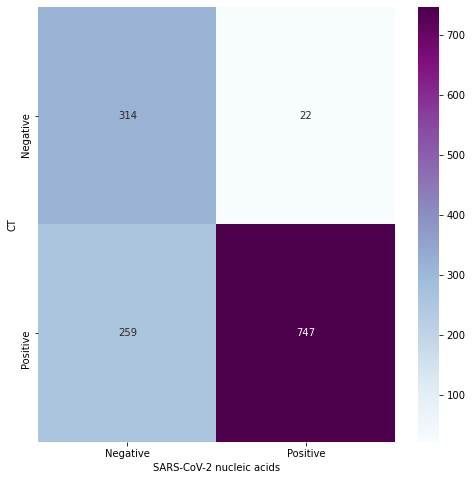

In [440]:
#Comparison between tests results for SARS-CoV-2 nucleic acids and CT 
test_list=dataset['SARS-CoV-2 nucleic acids']
print(test_list)
positive = test_list.loc[dataset['SARS-CoV-2 nucleic acids'] == 'Positive'].count()
print('Total of positive cases :',positive)
negative = test_list.loc[dataset['SARS-CoV-2 nucleic acids'] == 'Negative'].count()
print('Total of negative cases :',negative)

ct_test_list=dataset['CT']
print(test_list)
ctpositive = ct_test_list.loc[dataset['CT'] == 'Positive'].count()
print('Total of positive cases :',ctpositive)
ctnegative = ct_test_list.loc[dataset['CT'] == 'Negative'].count()
print('Total of negative cases :',ctnegative)


joint_matrix2 = pd.crosstab(ct_test_list, test_list)
print (joint_matrix2)
plt.figure(facecolor='white',figsize=(8,8))
sns.heatmap(joint_matrix2, annot=True, fmt='g',cmap="BuPu")
plt.savefig('tests_vs_scans.png')
plt.show()


## Underlying diseases

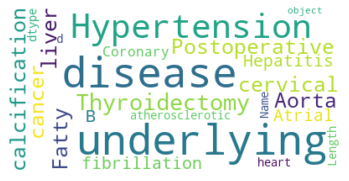

In [231]:
text = str(dataset['Underlying diseases'])
wordcloud = WordCloud(max_font_size=50,max_words=600, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [51]:
dataset['No illness'] =np.where( dataset['Underlying diseases'] == 'No underlying disease',True,False)
dataset.head()


,Hospital,Patient,Age,Gender,SARS-CoV-2 nucleic acids,CT,Morbidity,Mortality,Body temperature,Underlying diseases,No illness
0,HUST-Union Hospital,Patient 1,81,Male,Positive,Positive,Regular,Cured,36.6°C,"Hypertension, Thyroidectomy",False
1,HUST-Union Hospital,Patient 2,50,Male,Positive,Positive,Regular,Cured,38.7°C,No underlying disease,True
2,HUST-Union Hospital,Patient 3,65,Female,Positive,Positive,Regular,Cured,38.5°C,Postoperative cervical cancer,False
3,HUST-Union Hospital,Patient 4,73,Male,Positive,Positive,Severe,Cured,38.5°C,Aorta calcification,False
4,HUST-Union Hospital,Patient 5,64,Female,Positive,Positive,Severe,Cured,38.0°C,No underlying disease,True


In [52]:
dataset['Cardiovascular Diseases'] =np.where( (dataset['Underlying diseases'] == 'Hypertension') 
| (dataset['Underlying diseases'] == 'Aorta calcification') 
| (dataset['Underlying diseases'] == 'Aortic dissection') 
| (dataset['Underlying diseases'] == 'Aortic valve replacement') 
| (dataset['Underlying diseases'] == 'Arrhythmia, Hashimoto thyroiditis') 
| (dataset['Underlying diseases'] == 'Atrial fibrillation') 
| (dataset['Underlying diseases'] == 'Coronary atherosclerotic heart disease') 
| (dataset['Underlying diseases'] == 'Coronary atherosclerotic heart disease, Angina pectoris, Hypertension, Hypertension heart disease, Hyperlipidemia, Chronic obstructive pulmonary disease, Cerebral infarction, Atrial fibrillation') 
| (dataset['Underlying diseases'] == 'Coronary atherosclerotic heart disease, Angina pectoris, Percutaneous coronary intervention, Diabetes, Intestinal obstruction, Cerebral infarction, Cervical spondylosis, Chronic erosive gastritis, Gastrointestinal bleeding, Arrhythmia') 
| (dataset['Underlying diseases'] == 'Coronary atherosclerotic heart disease, Basic lung disease, Diabetes') 
| (dataset['Underlying diseases'] == 'Coronary atherosclerotic heart disease, Diabetes, Chronic obstructive pulmonary disease') 
| (dataset['Underlying diseases'] == 'Coronary atherosclerotic heart disease, Diabetes, Hypertension') 
| (dataset['Underlying diseases'] == 'Coronary atherosclerotic heart disease, Diabetes, Inguinal hernia repair, Gastric cancer, Major gastrectomy, Hypertension, Premature ventricular contraction, Gallbladder stones') 
| (dataset['Underlying diseases'] == 'Coronary atherosclerotic heart disease, Hypertension') 
| (dataset['Underlying diseases'] == 'Coronary atherosclerotic heart disease, Hypertension, Diabetes') 
| (dataset['Underlying diseases'] == 'Coronary atherosclerotic heart disease, Hypertension, Diabetes, Chronic renal insufficiency') 
| (dataset['Underlying diseases'] == 'Coronary atherosclerotic heart disease, Hypertension, Diabetes, Stroke') 
| (dataset['Underlying diseases'] == 'Coronary atherosclerotic heart disease, Hypertension, Senile degenerative valvular heart disease, Lacunar infarction, Cerebral atherosclerosis, Diabetes') 
| (dataset['Underlying diseases'] == 'Coronary atherosclerotic heart disease, Myocardial infarction, Diabetes') 
| (dataset['Underlying diseases'] == 'Coronary atherosclerotic heart disease, Percutaneous coronary intervention') 
| (dataset['Underlying diseases'] == 'Coronary atherosclerotic heart disease, Stroke, Malignant tumor, Basic lung disease') 
| (dataset['Underlying diseases'] == 'Coronary atherosclerotic heart disease, Uremia, Hypertension') 
| (dataset['Underlying diseases'] == 'Coronary disease') 
| (dataset['Underlying diseases'] == 'Coronary disease, Acute myocardial infarction, Dilated cardiomyopathy, Aortic valve stenosis, Mitral valve insufficiency, Tricuspidincompetence, Sscending aortic valve widening, Pulmonary artery widening with severe pulmonary hypertension, Hypertension, Chronic gastritis, Duodenal bulbar ulcer , Chronic hepatitis B') 
| (dataset['Underlying diseases'] == 'Coronary disease, Coronary stent implantation') 
| (dataset['Underlying diseases'] == 'Coronary disease, Diabetes') 
| (dataset['Underlying diseases'] == 'Coronary disease, Diabetes, Hypertension') 
| (dataset['Underlying diseases'] == 'Coronary disease, Gastritis') 
| (dataset['Underlying diseases'] == 'Coronary disease, Hyperlipidemia, Diabetes, Hyperuricemia') 
| (dataset['Underlying diseases'] == 'Coronary disease, Hypertension') 
| (dataset['Underlying diseases'] == 'Coronary disease, Hypertension, Diabetes') 
| (dataset['Underlying diseases'] == 'Coronary disease, Hypothyroidism') 
| (dataset['Underlying diseases'] == 'Coronary disease, Percutaneous coronary intervention, Renal insufficiency, Hypertension, Gout, Intracranial aneurysm, Old cerebral infarction') 
| (dataset['Underlying diseases'] == 'Heart disease') 
| (dataset['Underlying diseases'] == 'Heart disease, Hypertension') 
| (dataset['Underlying diseases'] == 'Heart disease, Hypertension, Lacunar infarction')
| (dataset['Underlying diseases'] == 'Heart disease, Parkinsonism') 
| (dataset['Underlying diseases'] == 'Heart failure, Coronary atherosclerotic heart disease, Diabetes') 
| (dataset['Underlying diseases'] == 'Hypertension')
| (dataset['Underlying diseases'] == 'Hypertension, Arrhythmia') 
| (dataset['Underlying diseases'] == 'Hypertension, Atherosclerosis, Fatty liver') 
| (dataset['Underlying diseases'] == 'Hypertension, Atrial fibrillation')
| (dataset['Underlying diseases'] == 'Hypertension, Atrial fibrillation, Interstitial pneumonia, Coronary atherosclerotic heart disease, Percutaneous coronary intervention') 
| (dataset['Underlying diseases'] == 'Hypertension, Basic lung disease') 
| (dataset['Underlying diseases'] == 'Hypertension, Benign prostatic hyperplasia')
| (dataset['Underlying diseases'] == 'Hypertension, Cerebral hemorrhage')
| (dataset['Underlying diseases'] == 'Hypertension, Cerebral hemorrhage, Cerebral infarction, Gastric ulcer, Gastrointestinal bleeding, Senile degenerative heart valve disease, Chronic bronchitis, Emphysema, Pleural effusion, Gallbladder stones, Kidney stones, Thyroid nodules, Prostate hyperplasia') 
| (dataset['Underlying diseases'] == 'Hypertension, Cerebral infarction') 
| (dataset['Underlying diseases'] == 'Hypertension, Cerebral infarction, Diabetes')
| (dataset['Underlying diseases'] == 'Hypertension, Cerebral infarction, Fatty liver, Respiratory infections, Pleural effusion') 
| (dataset['Underlying diseases'] == 'Hypertension, Cerebral infarction, Heart disease, Hyperthyroidism') 
| (dataset['Underlying diseases'] == 'Hypertension, Cerebral infarction, Lower limb atherosclerosis, Subdural effusion, Cardiac insufficiency, Pericardial effusion, Pleural effusion')
| (dataset['Underlying diseases'] == 'Hypertension, Cerebral infarction, Osteoporosis, Chronic cholecystitis, Abnormal liver function, Agranulocytosis, Alzheimer''s disease')
| (dataset['Underlying diseases'] == 'Hypertension, Cholecystitis') 
| (dataset['Underlying diseases'] == 'Hypertension, Chronic pharyngitis') 
| (dataset['Underlying diseases'] == 'Hypertension, Chronic renal failure')
| (dataset['Underlying diseases'] == 'Hypertension, Chronic stomach disease') 
| (dataset['Underlying diseases'] == 'Hypertension, Colon cancer surgery') 
| (dataset['Underlying diseases'] == 'Hypertension, Coronary atherosclerotic heart disease')
| (dataset['Underlying diseases'] == 'Hypertension, Coronary atherosclerotic heart disease, Chronic renal failure, Diabetes')
| (dataset['Underlying diseases'] == 'Hypertension, Coronary atherosclerotic heart disease, Diabetes') 
| (dataset['Underlying diseases'] == 'Hypertension, Coronary atherosclerotic heart disease, Heart failure, Cerebral infarction, Hyperlipidemia, Chronic gastritis') 
| (dataset['Underlying diseases'] == 'Hypertension, Coronary atherosclerotic heart disease, Hyperlipidemia')
| (dataset['Underlying diseases'] == 'Hypertension, Coronary atherosclerotic heart disease, Hyperlipidemia, Atrial fibrillation, Cerebral infarction') 
| (dataset['Underlying diseases'] == 'Hypertension, Coronary disease') 
| (dataset['Underlying diseases'] == 'Hypertension, Coronary disease, Gout, Adrenal adenoma, Diabetes')
| (dataset['Underlying diseases'] == 'Hypertension, Diabetes')
| (dataset['Underlying diseases'] == 'Hypertension, Diabetes, Basic lung disease')
| (dataset['Underlying diseases'] == 'Hypertension, Diabetes, Chronic gastritis') 
| (dataset['Underlying diseases'] == 'Hypertension, Diabetes, Coronary atherosclerotic heart disease') 
| (dataset['Underlying diseases'] == 'Hypertension, Diabetes, Coronary disease')
| (dataset['Underlying diseases'] == 'Hypertension, Diabetes, Diabetes, Nephrosis') 
| (dataset['Underlying diseases'] == 'Hypertension, Diabetes, Heartdisease') 
| (dataset['Underlying diseases'] == 'Hypertension, Diabetes, Hyperlipemia')
| (dataset['Underlying diseases'] == 'Hypertension, Diabetes, Hyperlipemia, Renal calculus')
| (dataset['Underlying diseases'] == 'Hypertension, Diabetes, Hyperlipidemia') 
| (dataset['Underlying diseases'] == 'Hypertension, Diabetes, Hypertensionheart disease, Interstitial lung disease, Hyperplasia of prostate, Chronic renal insufficiency') 
| (dataset['Underlying diseases'] == 'Hypertension, Diabetes, Hyperthyroidism')
| (dataset['Underlying diseases'] == 'Hypertension, Diabetes, Malignant tumor') 
| (dataset['Underlying diseases'] == 'Hypertension, Diabetes, Postoperative breast cancer') 
| (dataset['Underlying diseases'] == 'Hypertension, Diabetes, Renal insufficiency, Lacunar cerebral infarction')
| (dataset['Underlying diseases'] == 'Hypertension, Diabetes, Stroke, Basic lung disease')
| (dataset['Underlying diseases'] == 'Hypertension, Diabetes, Uremia')
| (dataset['Underlying diseases'] == 'Hypertension, Emphysema')
| (dataset['Underlying diseases'] == 'Hypertension, Gastrectomy') 
| (dataset['Underlying diseases'] == 'Hypertension, Gout') 
| (dataset['Underlying diseases'] == 'Hypertension, Gout, Hepatic cyst, Cholecystolithiasis, Renal cyst')
| (dataset['Underlying diseases'] == 'Hypertension, Heart disease') 
| (dataset['Underlying diseases'] == 'Hypertension, Heart disease, Diabetes') 
| (dataset['Underlying diseases'] == 'Hypertension, Hepatic cyst, Renal cyst, Renal calculus')
| (dataset['Underlying diseases'] == 'Hypertension, Hepatitis B, Coronary disease')
| (dataset['Underlying diseases'] == 'Hypertension, Hyperglycemia')
| (dataset['Underlying diseases'] == 'Hypertension, Hyperkalemia, Anaemia')
| (dataset['Underlying diseases'] == 'Hypertension, Hyperlipemia, Hyperuricemia') 
| (dataset['Underlying diseases'] == 'Hypertension, Hyperlipidemia') 
| (dataset['Underlying diseases'] == 'Hypertension, Hyperlipidemia, Arrhythmia')
| (dataset['Underlying diseases'] == 'Hypertension, Hyperlipidemia, Cerebral infarction, Diabetes, Chronic obstructive pulmonary disease, Benign prostatic hyperplasia, Atrial flutter, Hypothyroidism') 
| (dataset['Underlying diseases'] == 'Hypertension, Hyperlipidemia, Fatty liver, Cerebral infarction') 
| (dataset['Underlying diseases'] == 'Hypertension, Hyperplasia of prostate')
| (dataset['Underlying diseases'] == 'Hypertension, Hypertensive heart disease, Left femoral head necrosis, Right femoral neck fracture, Cerebral infarction')
| (dataset['Underlying diseases'] == 'Hypertension, Hyperuricemia')
| (dataset['Underlying diseases'] == 'Hypertension, Hypothyroidism, Hyperuricemia')
| (dataset['Underlying diseases'] == 'Hypertension, Kidney stones, Fatty liver, Hyperlipidemia')
| (dataset['Underlying diseases'] == 'Hypertension, Lacunar cerebral infarction') 
| (dataset['Underlying diseases'] == 'Hypertension, Lung cancer') 
| (dataset['Underlying diseases'] == 'Hypertension, Malignant tumor')
| (dataset['Underlying diseases'] == 'Hypertension, Myocardial infarction, Cholecystolithiasis surgery') 
| (dataset['Underlying diseases'] == 'Hypertension, Pacemaker implantation') 
| (dataset['Underlying diseases'] == 'Hypertension, Postoperative chemotherapy for rectal cancer')
| (dataset['Underlying diseases'] == 'Hypertension, Postoperative colon cancer')
| (dataset['Underlying diseases'] == 'Hypertension, Postoperative gastric cancer') 
| (dataset['Underlying diseases'] == 'Hypertension, Postoperative ovarian cancer')
| (dataset['Underlying diseases'] == 'Hypertension, Renal failure') 
| (dataset['Underlying diseases'] == 'Hypertension, Renal insufficiency') 
| (dataset['Underlying diseases'] == 'Myocardial bridge')
| (dataset['Underlying diseases'] == 'Myocardial infarction, Heart failure, Prostate cancer, Lacunar cerebral infarction, Parkinson disease')
| (dataset['Underlying diseases'] == 'Rheumatic heart disease') 
| (dataset['Underlying diseases'] == 'Rheumatic heart disease, Atrial fibrillation')
| (dataset['Underlying diseases'] == 'Rheumatic heart disease, Hypertension, Bilateral bronchitis, Cholecystitis') 
| (dataset['Underlying diseases'] == 'Rheumatic heart disease, Mechanical mitral valve replacement') 
| (dataset['Underlying diseases'] == 'Valvular heart disease, Lactic acidosis, Hypertension')
| (dataset['Underlying diseases'] == 'Valvular heart disease, Sinus rhythm') 
| (dataset['Underlying diseases'] == 'Vascular sclerosis')
| (dataset['Underlying diseases'] == 'Vasovagal syncope') 
,True,False)

dataset


,Hospital,Patient,Age,Gender,SARS-CoV-2 nucleic acids,CT,Morbidity,Mortality,Body temperature,Underlying diseases,No illness,Cardiovascular Diseases
0,HUST-Union Hospital,Patient 1,81,Male,Positive,Positive,Regular,Cured,36.6°C,"Hypertension, Thyroidectomy",False,False
1,HUST-Union Hospital,Patient 2,50,Male,Positive,Positive,Regular,Cured,38.7°C,No underlying disease,True,False
2,HUST-Union Hospital,Patient 3,65,Female,Positive,Positive,Regular,Cured,38.5°C,Postoperative cervical cancer,False,False
3,HUST-Union Hospital,Patient 4,73,Male,Positive,Positive,Severe,Cured,38.5°C,Aorta calcification,False,True
4,HUST-Union Hospital,Patient 5,64,Female,Positive,Positive,Severe,Cured,38.0°C,No underlying disease,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1516,HUST-Union Hospital,Patient 1517,45,Female,Positive,Positive,Regular,Cured,38.9°C,"Fatty liver, Hepatitis B",False,False
1517,HUST-Union Hospital,Patient 1518,66,Female,Positive,Positive,Regular,Cured,36.6°C,No underlying disease,True,False
1518,HUST-Union Hospital,Patient 1519,71,Female,Positive,Positive,Regular,Cured,36.6°C,"Hypertension, Atrial fibrillation",False,True
1519,HUST-Union Hospital,Patient 1520,66,Female,Positive,Positive,Regular,Cured,36.6°C,No underlying disease,True,False


In [53]:
dataset['Oncological Disorders'] =np.where( (dataset['Underlying diseases'] == 'Acute lymphoblastic leukemia') 
| (dataset['Underlying diseases'] == 'Acute myeloid leukemia') 
| (dataset['Underlying diseases'] == 'Chemotherapy for malignant tumor, Acute lymphoblastic leukemia') 
| (dataset['Underlying diseases'] == 'Chronic lymphocytic leukemia, Cholecystitis, Erosive gastritis, Duodenal bulbar ulcer, Chronic hepatitis B, Cirrhosis of liver') 
| (dataset['Underlying diseases'] == 'Chronic lymphocytic leukemia, Prostate tumor, Diabetes') 
| (dataset['Underlying diseases'] == 'Hematopoietic stem cell transplantation, Acute myeloid leukemia, Severe immunodeficiency, Obstructive jaundice') 
| (dataset['Underlying diseases'] == 'Type B lymphocytic leukemia, Hematopoietic stem cell transplantation')
| (dataset['Underlying diseases'] == 'After breast cancer surgery') 
| (dataset['Underlying diseases'] == 'Breast cancer surgery') 
| (dataset['Underlying diseases'] == 'Cervical spondylosis, Diabetes, Postoperative gastric cancer, Left femoral head replacement, Inguinal hernia, Left rib fracture, Arrhythmia, Fatty liver, Intrahepatic bile duct stones') 
| (dataset['Underlying diseases'] == 'Chemotherapy after radical operation of colon cancer') 
| (dataset['Underlying diseases'] == 'Chronic obstructive pulmonary disease, Bronchial asthma, After radical resection of lung cancer') 
| (dataset['Underlying diseases'] == 'Coronary atherosclerotic heart disease, Diabetes, Inguinal hernia repair, Gastric cancer, Major gastrectomy, Hypertension, Premature ventricular contraction, Gallbladder stones')
| (dataset['Underlying diseases'] == 'Gastric cancer surgery, Hypertension') 
| (dataset['Underlying diseases'] == 'Gastric ulcer, Surgery after pancreatic cancer with metastasis of lung and liver')
| (dataset['Underlying diseases'] == 'Hypertension, Lung cancer') 
| (dataset['Underlying diseases'] == 'Hypertension, Malignant tumor')
| (dataset['Underlying diseases'] == 'Hypertension, Myocardial infarction, Cholecystolithiasis surgery') 
| (dataset['Underlying diseases'] == 'Hypertension, Pacemaker implantation') 
| (dataset['Underlying diseases'] == 'Hypertension, Postoperative chemotherapy for rectal cancer')
| (dataset['Underlying diseases'] == 'Hypertension, Postoperative colon cancer')
| (dataset['Underlying diseases'] == 'Hypertension, Postoperative gastric cancer') 
| (dataset['Underlying diseases'] == 'Hypertension, Postoperative ovarian cancer')
| (dataset['Underlying diseases'] == 'Lung cancer') 
| (dataset['Underlying diseases'] == 'Lung cancer, Coronary atherosclerotic heart disease, Myocardial infarction, Apical ventricular aneurysm, Chronic renal insufficiency, Lower limb atherosclerosis, Hypertension, Autoimmune hemolytic anemia, Prostatic hyperplasia, Hyperuricemia, Double kidney stones, Gout')
| (dataset['Underlying diseases'] == 'Myocardial infarction, Heart failure, Prostate cancer, Lacunar cerebral infarction, Parkinson disease') 
| (dataset['Underlying diseases'] == 'Pancreatic cancer with metastasis') 
| (dataset['Underlying diseases'] == 'Postoperative thyroid cancer')
| (dataset['Underlying diseases'] == 'Postoperative prostate cancer')
| (dataset['Underlying diseases'] == 'Postoperative cervical cancer')
| (dataset['Underlying diseases'] == 'Pulmonary nodule, Postoperative testicular cancer')
| (dataset['Underlying diseases'] == 'Prostate cancer with bone metastasis') 
| (dataset['Underlying diseases'] == 'Radical operation of colon cancer')
| (dataset['Underlying diseases'] == 'Radical resection of rectal cancer')
| (dataset['Underlying diseases'] == 'Resection of bladder cancer')
| (dataset['Underlying diseases'] == 'Resection of lung cancer')
| (dataset['Underlying diseases'] == 'Resection of ovarian cancer') 
| (dataset['Underlying diseases'] == 'Targeted therapy after lung cancer surgery, Coronary disease, Atrial fibrillation')
| (dataset['Underlying diseases'] == 'Targeted therapy after lung cancer surgery, Extensive atherosclerosis of arteries in both lower extremities, Diabetes, Hypertension') 
,True,False)

dataset

,Hospital,Patient,Age,Gender,SARS-CoV-2 nucleic acids,CT,Morbidity,Mortality,Body temperature,Underlying diseases,No illness,Cardiovascular Diseases,Oncological Disorders
0,HUST-Union Hospital,Patient 1,81,Male,Positive,Positive,Regular,Cured,36.6°C,"Hypertension, Thyroidectomy",False,False,False
1,HUST-Union Hospital,Patient 2,50,Male,Positive,Positive,Regular,Cured,38.7°C,No underlying disease,True,False,False
2,HUST-Union Hospital,Patient 3,65,Female,Positive,Positive,Regular,Cured,38.5°C,Postoperative cervical cancer,False,False,True
3,HUST-Union Hospital,Patient 4,73,Male,Positive,Positive,Severe,Cured,38.5°C,Aorta calcification,False,True,False
4,HUST-Union Hospital,Patient 5,64,Female,Positive,Positive,Severe,Cured,38.0°C,No underlying disease,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,HUST-Union Hospital,Patient 1517,45,Female,Positive,Positive,Regular,Cured,38.9°C,"Fatty liver, Hepatitis B",False,False,False
1517,HUST-Union Hospital,Patient 1518,66,Female,Positive,Positive,Regular,Cured,36.6°C,No underlying disease,True,False,False
1518,HUST-Union Hospital,Patient 1519,71,Female,Positive,Positive,Regular,Cured,36.6°C,"Hypertension, Atrial fibrillation",False,True,False
1519,HUST-Union Hospital,Patient 1520,66,Female,Positive,Positive,Regular,Cured,36.6°C,No underlying disease,True,False,False


In [54]:
dataset['Neurological Disorders'] =np.where( (dataset['Underlying diseases'] == 'Brain stem hemorrhage, Brain stem hematoma removal') 
| (dataset['Underlying diseases'] == 'Alzheimer''s disease') 
| (dataset['Underlying diseases'] == 'Alzheimer''s disease, Hypertension, Rheumatoid arthritis') 
| (dataset['Underlying diseases'] == 'Alzheimer''s disease, Hypertension, Stroke') 
| (dataset['Underlying diseases'] == 'Cerebral infarction, Hypertension, Alzheimer''s disease, Parkinson''s syndrome, Acute coronary syndrome, Chronic bronchitis, Emphysema, Lung infection, Hypoalbuminemia, Abnormal liver function, Small cell hypochromic anemia, Leukopenia, Pressure ulcers') 
| (dataset['Underlying diseases'] == 'Heart disease, Parkinsonism') 
| (dataset['Underlying diseases'] == 'Myocardial infarction, Heart failure, Prostate cancer, Lacunar cerebral infarction, Parkinson disease')
| (dataset['Underlying diseases'] == 'Parkinson disease') 
| (dataset['Underlying diseases'] == 'Parkinson, Urinary tract infection, Bladder stones, Chronic bronchitis, Emphysema, Right femoral neck fracture, Coronary atherosclerotic heart disease, Cerebral infarction, Lower extremity arteriosclerotic occlusive disease, Gallstone') 
| (dataset['Underlying diseases'] == 'Anaemia, Cerebral infarction, Chronic bronchitis') 
| (dataset['Underlying diseases'] == 'Cerebral infarction') 
| (dataset['Underlying diseases'] == 'Cerebral infarction, Cerebral hemorrhage, Hypertension, Diabetes') 
| (dataset['Underlying diseases'] == 'Cerebral infarction, Hypertension, Alzheimer''s disease, Parkinson''s syndrome, Acute coronary syndrome, Chronic bronchitis, Emphysema, Lung infection, Hypoalbuminemia, Abnormal liver function, Small cell hypochromic anemia, Leukopenia, Pressure ulcers') 
| (dataset['Underlying diseases'] == 'Cerebral infarction, Chronic bronchitis, Hypertension, Hypertension heart disease, Diabetes') 
| (dataset['Underlying diseases'] == 'Cerebral infarction, Chronic obstructive pulmonary disease, Hypertensio, Chronic heart failure')
| (dataset['Underlying diseases'] == 'Cerebral infarction, Chronic obstructive pulmonary disease, Hypertensio, Chronic heart failure') 
| (dataset['Underlying diseases'] == 'Cerebral infarction, Coronary atherosclerotic heart disease, Angina pectoris, Atrial fibrillation, Renal artery stenosis, Chronic renal failure, Hyperlipidemia, Fatty liver') 
| (dataset['Underlying diseases'] == 'Cerebral infarction, Coronary disease, Hypertension') 
| (dataset['Underlying diseases'] == 'Cerebral infarction, Diabetes, Hypertension, Arrhythmia') 
| (dataset['Underlying diseases'] == 'Cerebral infarction, Hypertension, Diabetes, Chronic urinary tract infection, Coronary atherosclerotic heart disease') 
| (dataset['Underlying diseases'] == 'Cerebral infarction, Mixed aphasia, Organic mental disorder, Hypertension, Diabetes, Thyroid nodules, Chronic bronchitis, Emphysema, Pleural effusion') 
| (dataset['Underlying diseases'] == 'Cerebral infarction, Senile dementia')
| (dataset['Underlying diseases'] == 'Cerebral infarction, Uremia') 
| (dataset['Underlying diseases'] == 'Chronic hepatitis B, Chronic bronchitis, Emphysema, Hypertension, Diabetes, Multiple lacunar cerebral infarction') 
| (dataset['Underlying diseases'] == 'Coronary atherosclerotic heart disease, Angina pectoris, Hypertension, Hypertension heart disease, Hyperlipidemia, Chronic obstructive pulmonary disease, Cerebral infarction, Atrial fibrillation') 
| (dataset['Underlying diseases'] == 'Coronary atherosclerotic heart disease, Angina pectoris, Percutaneous coronary intervention, Diabetes, Intestinal obstruction, Cerebral infarction, Cervical spondylosis, Chronic erosive gastritis, Gastrointestinal bleeding, Arrhythmia') 
| (dataset['Underlying diseases'] == 'Hypertension, Cerebral hemorrhage, Cerebral infarction, Gastric ulcer, Gastrointestinal bleeding, Senile degenerative heart valve disease, Chronic bronchitis, Emphysema, Pleural effusion, Gallbladder stones, Kidney stones, Thyroid nodules, Prostate hyperplasia') 
| (dataset['Underlying diseases'] == 'Coronary disease, Percutaneous coronary intervention, Renal insufficiency, Hypertension, Gout, Intracranial aneurysm, Old cerebral infarction')
| (dataset['Underlying diseases'] == 'Diabetes, Diabetic nephropathy, Post-cerebral infarction') 
| (dataset['Underlying diseases'] == 'Hypertension, Cerebral hemorrhage') 
| (dataset['Underlying diseases'] == 'Hypertension, Cerebral infarction') 
| (dataset['Underlying diseases'] == 'Hypertension, Cerebral infarction, Diabetes')
| (dataset['Underlying diseases'] == 'Hypertension, Cerebral infarction, Fatty liver, Respiratory infections, Pleural effusion') 
| (dataset['Underlying diseases'] == 'Hypertension, Cerebral infarction, Heart disease, Hyperthyroidism') 
| (dataset['Underlying diseases'] == 'Hypertension, Cerebral infarction, Lower limb atherosclerosis, Subdural effusion, Cardiac insufficiency, Pericardial effusion, Pleural effusion') 
| (dataset['Underlying diseases'] == 'Hypertension, Cerebral infarction, Osteoporosis, Chronic cholecystitis, Abnormal liver function, Agranulocytosis, Alzheimer''s disease') 
| (dataset['Underlying diseases'] == 'Hypertension, Coronary atherosclerotic heart disease, Heart failure, Cerebral infarction, Hyperlipidemia, Chronic gastritis') 
| (dataset['Underlying diseases'] == 'Lacunar cerebral infarction, Renal cyst, Atherosclerosis of aorta')
| (dataset['Underlying diseases'] == 'Myocardial infarction, Heart failure, Prostate cancer, Lacunar cerebral infarction, Parkinson disease') 
| (dataset['Underlying diseases'] == 'Hypertension, Cerebral hemorrhage') 
| (dataset['Underlying diseases'] == 'Postoperative cerebral aneurysm') 
| (dataset['Underlying diseases'] == 'Trial fibrillation, Hypertension, Permanent pacemaker implantation, Type 2 diabetes, Cerebral infarction, Duodenal ulcer, Prostatic hyperplasia, Chronic bronchitis')
,True,False)

dataset


,Hospital,Patient,Age,Gender,SARS-CoV-2 nucleic acids,CT,Morbidity,Mortality,Body temperature,Underlying diseases,No illness,Cardiovascular Diseases,Oncological Disorders,Neurological Disorders
0,HUST-Union Hospital,Patient 1,81,Male,Positive,Positive,Regular,Cured,36.6°C,"Hypertension, Thyroidectomy",False,False,False,False
1,HUST-Union Hospital,Patient 2,50,Male,Positive,Positive,Regular,Cured,38.7°C,No underlying disease,True,False,False,False
2,HUST-Union Hospital,Patient 3,65,Female,Positive,Positive,Regular,Cured,38.5°C,Postoperative cervical cancer,False,False,True,False
3,HUST-Union Hospital,Patient 4,73,Male,Positive,Positive,Severe,Cured,38.5°C,Aorta calcification,False,True,False,False
4,HUST-Union Hospital,Patient 5,64,Female,Positive,Positive,Severe,Cured,38.0°C,No underlying disease,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,HUST-Union Hospital,Patient 1517,45,Female,Positive,Positive,Regular,Cured,38.9°C,"Fatty liver, Hepatitis B",False,False,False,False
1517,HUST-Union Hospital,Patient 1518,66,Female,Positive,Positive,Regular,Cured,36.6°C,No underlying disease,True,False,False,False
1518,HUST-Union Hospital,Patient 1519,71,Female,Positive,Positive,Regular,Cured,36.6°C,"Hypertension, Atrial fibrillation",False,True,False,False
1519,HUST-Union Hospital,Patient 1520,66,Female,Positive,Positive,Regular,Cured,36.6°C,No underlying disease,True,False,False,False


In [55]:
dataset['Thorasic Disorders'] =np.where( (dataset['Underlying diseases'] == 'After nasopharyngeal carcinoma surgery') 
| (dataset['Underlying diseases'] == 'Asthma') 
| (dataset['Underlying diseases'] == 'Asthma, Coronary disease, Hypertension') 
| (dataset['Underlying diseases'] == 'Asthma, Hypertension, Diabetes') 
| (dataset['Underlying diseases'] == 'Asthma, Hypothyroidism') 
| (dataset['Underlying diseases'] == 'Basic lung disease, Stroke, Hypertension, Diabetes') 
| (dataset['Underlying diseases'] == 'Bipulmonary bronchitis, Emphysema, Hypertension, Diabetes, Chronic renal insufficiency') 
| (dataset['Underlying diseases'] == 'Bronchial asthma, Chronic bronchitis') 
| (dataset['Underlying diseases'] == 'Bronchiectasia') 
| (dataset['Underlying diseases'] == 'Bronchiectasia, Hyperlipidemia') 
| (dataset['Underlying diseases'] == 'Bronchiectasia, Hypertension') 
| (dataset['Underlying diseases'] == 'Bronchiectasia, Pulmonary heart disease, After radiotherapy and chemotherapy for rectal adenocarcinoma') 
| (dataset['Underlying diseases'] == 'Bronchitis') 
| (dataset['Underlying diseases'] == 'Bronchitis, Emphysema') 
| (dataset['Underlying diseases'] == 'Bronchitis, Erosive atrophic gastritis') 
| (dataset['Underlying diseases'] == 'Chronic bronchitis') 
| (dataset['Underlying diseases'] == 'Chronic bronchitis, Coronary disease, Diabetes') 
| (dataset['Underlying diseases'] == 'Chronic bronchitis, Emphysema') 
| (dataset['Underlying diseases'] == 'Chronic bronchitis, Emphysema, Benign prostatic hyperplasia') 
| (dataset['Underlying diseases'] == 'Chronic bronchitis, Hypertension, Coronary disease') 
| (dataset['Underlying diseases'] == 'Chronic bronchitis, Obsolete tuberculosis, Percutaneous coronary intervention, Hypertension') 
| (dataset['Underlying diseases'] == 'Chronic obstructive pulmonary disease') 
| (dataset['Underlying diseases'] == 'Chronic obstructive pulmonary disease, Bronchial asthma, After radical resection of lung cancer') 
| (dataset['Underlying diseases'] == 'Chronic obstructive pulmonary disease, Diabetes, Hypertension') 
| (dataset['Underlying diseases'] == 'Chronic obstructive pulmonary disease, Hepatitis B') 
| (dataset['Underlying diseases'] == 'Chronic obstructive pulmonary disease, Hypertension') 
| (dataset['Underlying diseases'] == 'Chronic obstructive pulmonary disease, Hypertension, Coronary atherosclerotic heart disease, Dementia, Diabetes, Subdural hemorrhage') 
| (dataset['Underlying diseases'] == 'Chronic obstructive pulmonary disease, Renal insufficiency, Hyperuricemia, Gout') 
| (dataset['Underlying diseases'] == 'Chronic prostatitis, Chronic bronchitis, Chronic pharyngitis, Chronic superficial gastritis')
| (dataset['Underlying diseases'] == 'Copd, Chronic bronchitis') 
| (dataset['Underlying diseases'] == 'Lung cancer') 
| (dataset['Underlying diseases'] == 'Lung cancer, Coronary atherosclerotic heart disease, Myocardial infarction, Apical ventricular aneurysm, Chronic renal insufficiency, Lower limb atherosclerosis, Hypertension, Autoimmune hemolytic anemia, Prostatic hyperplasia, Hyperuricemia, Double kidney stones, Gout') 
| (dataset['Underlying diseases'] == 'Lung tumor')  
| (dataset['Underlying diseases'] == 'Pulmonary encephalopathy, Hypertension') 
| (dataset['Underlying diseases'] == 'Pulmonary nodule') 
| (dataset['Underlying diseases'] == 'Pulmonary nodule, Hypertension') 
| (dataset['Underlying diseases'] == 'Pulmonary nodule, Postoperative testicular cancer')  
| (dataset['Underlying diseases'] == 'Right lung space occupying lesion, Hypertension, Diabetes')  

,True,False)

dataset


,Hospital,Patient,Age,Gender,SARS-CoV-2 nucleic acids,CT,Morbidity,Mortality,Body temperature,Underlying diseases,No illness,Cardiovascular Diseases,Oncological Disorders,Neurological Disorders,Thorasic Disorders
0,HUST-Union Hospital,Patient 1,81,Male,Positive,Positive,Regular,Cured,36.6°C,"Hypertension, Thyroidectomy",False,False,False,False,False
1,HUST-Union Hospital,Patient 2,50,Male,Positive,Positive,Regular,Cured,38.7°C,No underlying disease,True,False,False,False,False
2,HUST-Union Hospital,Patient 3,65,Female,Positive,Positive,Regular,Cured,38.5°C,Postoperative cervical cancer,False,False,True,False,False
3,HUST-Union Hospital,Patient 4,73,Male,Positive,Positive,Severe,Cured,38.5°C,Aorta calcification,False,True,False,False,False
4,HUST-Union Hospital,Patient 5,64,Female,Positive,Positive,Severe,Cured,38.0°C,No underlying disease,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,HUST-Union Hospital,Patient 1517,45,Female,Positive,Positive,Regular,Cured,38.9°C,"Fatty liver, Hepatitis B",False,False,False,False,False
1517,HUST-Union Hospital,Patient 1518,66,Female,Positive,Positive,Regular,Cured,36.6°C,No underlying disease,True,False,False,False,False
1518,HUST-Union Hospital,Patient 1519,71,Female,Positive,Positive,Regular,Cured,36.6°C,"Hypertension, Atrial fibrillation",False,True,False,False,False
1519,HUST-Union Hospital,Patient 1520,66,Female,Positive,Positive,Regular,Cured,36.6°C,No underlying disease,True,False,False,False,False


In [449]:
dataset['Endocrinological Disorders'] =np.where( (dataset['Underlying diseases'] == 'Thyroid gland resection') 
| (dataset['Underlying diseases'] == 'Diabetes') 
| (dataset['Underlying diseases'] == 'Hyperlipemia, Gout') 
| (dataset['Underlying diseases'] == 'Diabetes, Hyperlipidemia') 
| (dataset['Underlying diseases'] == 'Gout, Hypertension, Renal failure') 
| (dataset['Underlying diseases'] == 'Diabetes, Coronary atherosclerotic heart disease') 
| (dataset['Underlying diseases'] == 'Left renal cyst') 
| (dataset['Underlying diseases'] == 'Erosive gastritis, Diabetes, Hypertension') 
| (dataset['Underlying diseases'] == 'Chronic renal insufficiency, Uremia, Polycystic kidney, Hypertension, Atherosclerosis') 
| (dataset['Underlying diseases'] == 'Hypertension, Diabetes') 
| (dataset['Underlying diseases'] == 'Hypertension, Diabetes, Uremia') 
| (dataset['Underlying diseases'] == 'Coronary atherosclerotic heart disease, Hypertension, Diabetes') 
| (dataset['Underlying diseases'] == 'Hypertension, Hyperlipidemia, Cerebral infarction, Diabetes, Chronic obstructive pulmonary disease, Benign prostatic hyperplasia, Atrial flutter, Hypothyroidism') 
| (dataset['Underlying diseases'] == 'Hypertension, Diabetes, Stroke, Basic lung disease') 
| (dataset['Underlying diseases'] == 'Cerebral infarction, Cerebral hemorrhage, Hypertension, Diabetes') 
| (dataset['Underlying diseases'] == 'Cerebral infarction, Mixed aphasia, Organic mental disorder, Hypertension, Diabetes, Thyroid nodules, Chronic bronchitis, Emphysema, Pleural effusion') 
| (dataset['Underlying diseases'] == 'Coronary atherosclerotic heart disease, Diabetes, Hypertension') 

| (dataset['Underlying diseases'] == 'Asthma, Hypertension, Diabetes') 
| (dataset['Underlying diseases'] == 'Abnormal liver function, Hypertension, Diabetes, Hyperlipidemia') 
| (dataset['Underlying diseases'] == 'Basic lung disease, Stroke, Hypertension, Diabetes') 
| (dataset['Underlying diseases'] == 'Bipulmonary bronchitis, Emphysema, Hypertension, Diabetes, Chronic renal insufficiency') 
| (dataset['Underlying diseases'] == 'Cerebral infarction, Chronic bronchitis, Hypertension, Hypertension heart disease, Diabetes') 
| (dataset['Underlying diseases'] == 'Cervical spondylosis, Diabetes, Postoperative gastric cancer, Left femoral head replacement, Inguinal hernia, Left rib fracture, Arrhythmia, Fatty liver, Intrahepatic bile duct stones') 
| (dataset['Underlying diseases'] == 'Chronic gastritis, Diabetes') 
| (dataset['Underlying diseases'] == 'Chronic hepatitis B, Chronic bronchitis, Emphysema, Hypertension, Diabetes, Multiple lacunar cerebral infarction')

| (dataset['Underlying diseases'] == 'Chronic lymphocytic leukemia, Prostate tumor, Diabetes') 
| (dataset['Underlying diseases'] == 'Chronic obstructive pulmonary disease, Diabetes, Hypertension') 
| (dataset['Underlying diseases'] == 'Chronic obstructive pulmonary disease, Hypertension, Coronary atherosclerotic heart disease, Dementia, Diabetes, Subdural hemorrhage') 
| (dataset['Underlying diseases'] == 'Chronic renal insufficiency, Hypertension, Diabetes, Renal cyst') 
| (dataset['Underlying diseases'] == 'Coronary disease, Hyperlipidemia, Diabetes, Hyperuricemia') 
| (dataset['Underlying diseases'] == 'Coronary atherosclerotic heart disease, Hypertension, Diabetes') 
| (dataset['Underlying diseases'] == 'Coronary atherosclerotic heart disease, Hypertension, Diabetes, Chronic renal insufficiency')
| (dataset['Underlying diseases'] == 'Coronary atherosclerotic heart disease, Hypertension, Diabetes, Stroke') 
| (dataset['Underlying diseases'] == 'Coronary atherosclerotic heart disease, Hypertension, Senile degenerative valvular heart disease, Lacunar infarction, Cerebral atherosclerosis, Diabetes') 
| (dataset['Underlying diseases'] == 'Coronary atherosclerotic heart disease, Myocardial infarction, Diabetes') 
| (dataset['Underlying diseases'] == 'Coronary disease, Diabetes') 
| (dataset['Underlying diseases'] == 'Coronary disease, Diabetes, Hypertension') 
| (dataset['Underlying diseases'] == 'Diabetes, Coronary atherosclerotic heart disease') 
| (dataset['Underlying diseases'] == 'Diabetes, Coronary disease') 
| (dataset['Underlying diseases'] == 'Diabetes, Coronary disease, Myocardial infarction, Prostatectomy')
| (dataset['Underlying diseases'] == 'Diabetes, Coronary disease, Thyroid nodule') 
| (dataset['Underlying diseases'] == 'Diabetes, Diabetic nephropathy, Post-cerebral infarction') 
| (dataset['Underlying diseases'] == 'Diabetes, Fatty liver, hepatic cyst') 
| (dataset['Underlying diseases'] == 'Diabetes, Heart disease') 
| (dataset['Underlying diseases'] == 'Diabetes, Hyperlipidemia')
| (dataset['Underlying diseases'] == 'Diabetes, Hypertension') 
| (dataset['Underlying diseases'] == 'Diabetes, Hypertension, Chronic renal insufficiency') 
| (dataset['Underlying diseases'] == 'Diabetes, Hypertension, Coronary atherosclerotic heart disease') 
| (dataset['Underlying diseases'] == 'Diabetes, Hypertension, Heart disease') 
| (dataset['Underlying diseases'] == 'Diabetes, Hypertension, Hepatitis B, Thyroidectomy, Hyponatremia') 
| (dataset['Underlying diseases'] == 'Diabetes, Hypertension, Hypothyroidism, Cholecystectomy') 
| (dataset['Underlying diseases'] == 'Diabetes, Lung metastases, Lung infections, Fungal pneumonia, Organic mental disorders, Hypokalemia, Thrombocytopenia, Leukopenia') 
| (dataset['Underlying diseases'] == 'Diabetes, Renal failure, Hypertension, Coronary atherosclerotic heart disease') 

| (dataset['Underlying diseases'] == 'Hypertension, Diabetes')
| (dataset['Underlying diseases'] == 'Hypertension, Diabetes, Basic lung disease')
| (dataset['Underlying diseases'] == 'Hypertension, Diabetes, Chronic gastritis') 
| (dataset['Underlying diseases'] == 'Hypertension, Diabetes, Coronary atherosclerotic heart disease') 
| (dataset['Underlying diseases'] == 'Hypertension, Diabetes, Coronary disease')
| (dataset['Underlying diseases'] == 'Hypertension, Diabetes, Diabetes, Nephrosis') 
| (dataset['Underlying diseases'] == 'Hypertension, Diabetes, Heartdisease') 
| (dataset['Underlying diseases'] == 'Hypertension, Diabetes, Hyperlipemia')
| (dataset['Underlying diseases'] == 'Hypertension, Diabetes, Hyperlipemia, Renal calculus')
| (dataset['Underlying diseases'] == 'Hypertension, Diabetes, Hyperlipidemia') 
| (dataset['Underlying diseases'] == 'Hypertension, Diabetes, Hypertensionheart disease, Interstitial lung disease, Hyperplasia of prostate, Chronic renal insufficiency') 
| (dataset['Underlying diseases'] == 'Hypertension, Diabetes, Hyperthyroidism')
| (dataset['Underlying diseases'] == 'Hypertension, Diabetes, Malignant tumor') 
| (dataset['Underlying diseases'] == 'Hypertension, Diabetes, Postoperative breast cancer') 
| (dataset['Underlying diseases'] == 'Hypertension, Diabetes, Renal insufficiency, Lacunar cerebral infarction')
| (dataset['Underlying diseases'] == 'Hypertension, Diabetes, Stroke, Basic lung disease')
| (dataset['Underlying diseases'] == 'Hypertension, Diabetes, Uremia')
| (dataset['Underlying diseases'] == 'Hypertension, Emphysema')
| (dataset['Underlying diseases'] == 'Hypertension, Gastrectomy') 
| (dataset['Underlying diseases'] == 'Hypertension, Gout') 
| (dataset['Underlying diseases'] == 'Hypertension, Gout, Hepatic cyst, Cholecystolithiasis, Renal cyst')

| (dataset['Underlying diseases'] == 'Non Hodgkin''s lymphoma, Coronary atherosclerotic heart disease, Diabetes')
| (dataset['Underlying diseases'] == 'Right lung space occupying lesion, Hypertension, Diabetes')
| (dataset['Underlying diseases'] == 'Targeted therapy after lung cancer surgery, Extensive atherosclerosis of arteries in both lower extremities, Diabetes, Hypertension') 
| (dataset['Underlying diseases'] == 'Tonsillectomy, Diabetes') 
| (dataset['Underlying diseases'] == 'Trial fibrillation, Hypertension, Permanent pacemaker implantation, Type 2 diabetes, Cerebral infarction, Duodenal ulcer, Prostatic hyperplasia, Chronic bronchitis')

,True,False)

dataset

,Hospital,Patient,Age,Gender,SARS-CoV-2 nucleic acids,CT,Morbidity,Mortality,Body temperature,Underlying diseases,No illness,Cardiovascular Diseases,Oncological Disorders,Neurological Disorders,Thorasic Disorders,Endocrinological Disorders
0,HUST-Union Hospital,Patient 1,81,Male,Positive,Positive,Regular,Cured,36.6°C,"Hypertension, Thyroidectomy",False,False,False,False,False,False
1,HUST-Union Hospital,Patient 2,50,Male,Positive,Positive,Regular,Cured,38.7°C,No underlying disease,True,False,False,False,False,False
2,HUST-Union Hospital,Patient 3,65,Female,Positive,Positive,Regular,Cured,38.5°C,Postoperative cervical cancer,False,False,True,False,False,False
3,HUST-Union Hospital,Patient 4,73,Male,Positive,Positive,Severe,Cured,38.5°C,Aorta calcification,False,True,False,False,False,False
4,HUST-Union Hospital,Patient 5,64,Female,Positive,Positive,Severe,Cured,38.0°C,No underlying disease,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,HUST-Union Hospital,Patient 1517,45,Female,Positive,Positive,Regular,Cured,38.9°C,"Fatty liver, Hepatitis B",False,False,False,False,False,False
1517,HUST-Union Hospital,Patient 1518,66,Female,Positive,Positive,Regular,Cured,36.6°C,No underlying disease,True,False,False,False,False,False
1518,HUST-Union Hospital,Patient 1519,71,Female,Positive,Positive,Regular,Cured,36.6°C,"Hypertension, Atrial fibrillation",False,True,False,False,False,False
1519,HUST-Union Hospital,Patient 1520,66,Female,Positive,Positive,Regular,Cured,36.6°C,No underlying disease,True,False,False,False,False,False


0       Positive
1       Positive
2       Positive
3       Positive
4       Positive
          ...   
1516    Positive
1517    Positive
1518    Positive
1519    Positive
1520    Positive
Name: SARS-CoV-2 nucleic acids, Length: 1521, dtype: object
Total of positive cases : 894
SARS-CoV-2 nucleic acids  Negative  Positive
No illness                                  
False                          287       382
True                           340       512


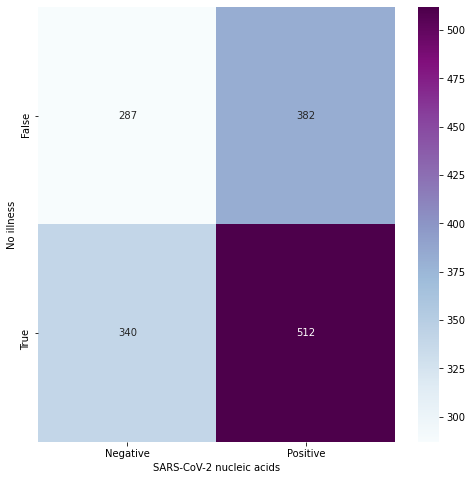

In [448]:
#Positive Vs Disease
test_list=dataset['SARS-CoV-2 nucleic acids']
print(test_list)
positive = test_list.loc[dataset['SARS-CoV-2 nucleic acids'] == 'Positive'].count()
print('Total of positive cases :',positive)
no_illness=dataset['No illness']
false = no_illness.loc[dataset['No illness'] == 'False'].count()
true = no_illness.loc[dataset['No illness'] == 'True'].count()

joint_matrix3 = pd.crosstab(no_illness, test_list)
print (joint_matrix3)
plt.figure(facecolor='white',figsize=(8,8))
sns.heatmap(joint_matrix3, annot=True, fmt='g',cmap="BuPu")
plt.savefig('tests_vs_noillness.png')
plt.show()




From the previous graph, we may deduce that patients with no underlying diseases are more likely to have positive SARS-CoV-2 nucleic acids 

SARS-CoV-2 nucleic acids  Negative  Positive
Cardiovascular Diseases                     
False                          495       706
True                           132       188


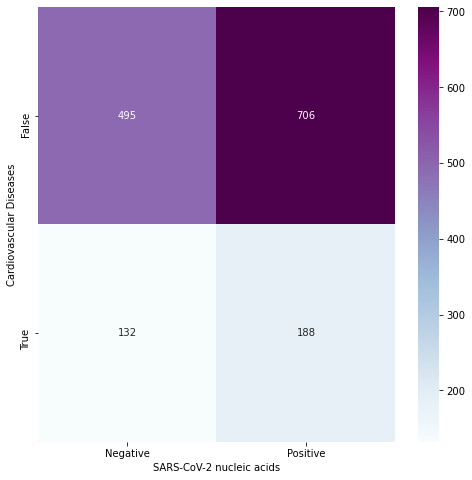

In [447]:
cardiovascular=dataset['Cardiovascular Diseases']
false = cardiovascular.loc[dataset['Cardiovascular Diseases'] == 'False'].count()
true = cardiovascular.loc[dataset['Cardiovascular Diseases'] == 'True'].count()

joint_matrix4 = pd.crosstab(cardiovascular, test_list)
print (joint_matrix4)
plt.figure(facecolor='white',figsize=(8,8))
sns.heatmap(joint_matrix4, annot=True, fmt='g',cmap="BuPu")
plt.savefig('tests_vs_cardio.png')
plt.show()



As we can deduce, most of the patients who have :
- cardiovascular diseases 
- thorasic disorders 
- oncological disorders

are more likely to have positive SARS-Cov2 nucleic acids

SARS-CoV-2 nucleic acids  Negative  Positive
Thorasic Disorders                          
False                          602       872
True                            25        22


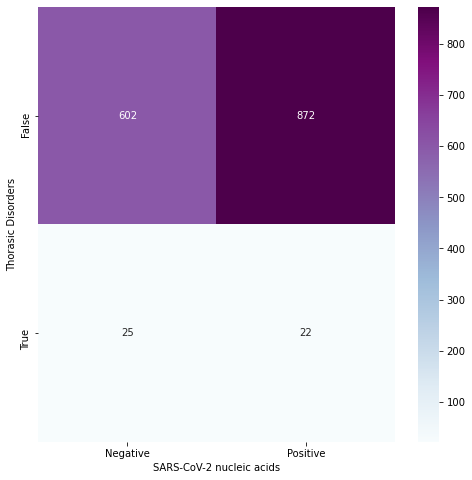

In [446]:
thorasic=dataset['Thorasic Disorders']
false = thorasic.loc[dataset['Thorasic Disorders'] == 'False'].count()
true = thorasic.loc[dataset['Thorasic Disorders'] == 'True'].count()

joint_matrix5 = pd.crosstab(thorasic, test_list)
print (joint_matrix5)
plt.figure(facecolor='white',figsize=(8,8))
sns.heatmap(joint_matrix5, annot=True, fmt='g',cmap="BuPu")
plt.savefig('tests_vs_thoracic.png')
plt.show()


SARS-CoV-2 nucleic acids  Negative  Positive
Oncological Disorders                       
False                          602       869
True                            25        25


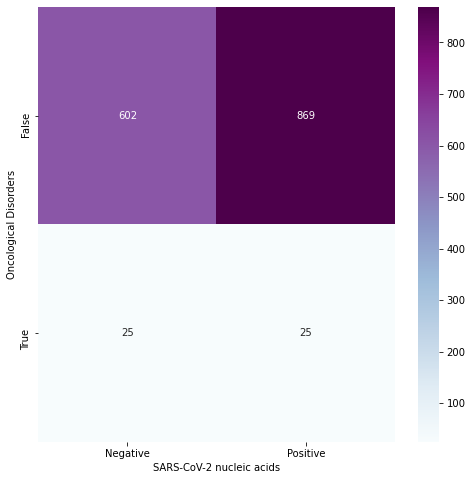

In [445]:
oncology=dataset['Oncological Disorders']
false = oncology.loc[dataset['Oncological Disorders'] == 'False'].count()
true = oncology.loc[dataset['Oncological Disorders'] == 'True'].count()

joint_matrix6 = pd.crosstab(oncology, test_list)
print (joint_matrix6)
plt.figure(facecolor='white',figsize=(8,8))
sns.heatmap(joint_matrix6, annot=True, fmt='g',cmap="BuPu")
plt.savefig('tests_vs_onco.png')
plt.show()


SARS-CoV-2 nucleic acids    Negative  Positive
Endocrinological Disorders                    
False                            562       787
True                              65       107


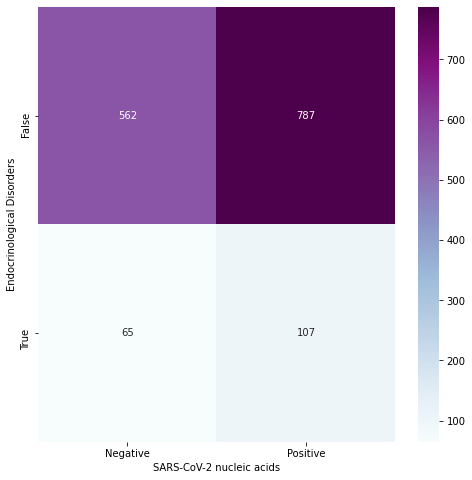

In [450]:
endo=dataset['Endocrinological Disorders']
false = oncology.loc[dataset['Endocrinological Disorders'] == 'False'].count()
true = oncology.loc[dataset['Endocrinological Disorders'] == 'True'].count()

joint_matrix7 = pd.crosstab(endo, test_list)
print (joint_matrix7)
plt.figure(facecolor='white',figsize=(8,8))
sns.heatmap(joint_matrix7, annot=True, fmt='g',cmap="BuPu")
plt.savefig('tests_vs_endo.png')
plt.show()

## Body Temperature

0       36.6
1       36.2
2       36.6
3        NaN
4        NaN
        ... 
1516     NaN
1517     NaN
1518     NaN
1519     NaN
1520     NaN
Name: Body temperature, Length: 1521, dtype: float64
The average body temperature of the dataset is 38
The most common body temperature is [36.6]
The new total of body temperature is 1368


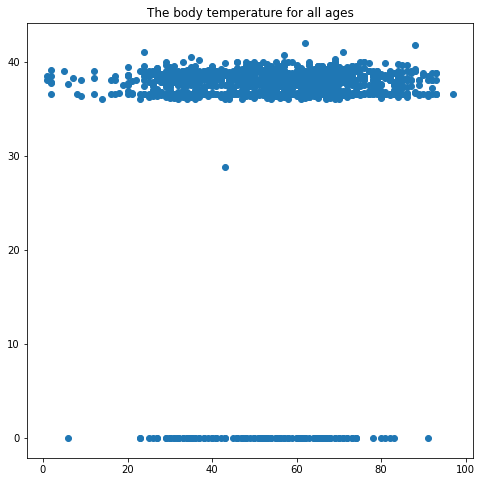

The sample of body temperature 48       0.0
621     36.6
404     38.0
168     36.6
1250    36.5
        ... 
1171    36.6
950     37.8
864     38.2
422     38.3
937     36.2
Name: Body temperature, Length: 200, dtype: float64
The sample of age 484     49
337     30
1385    53
294     38
1125    82
        ..
53      59
951     93
1447    62
265     29
199     53
Name: Age, Length: 200, dtype: int64


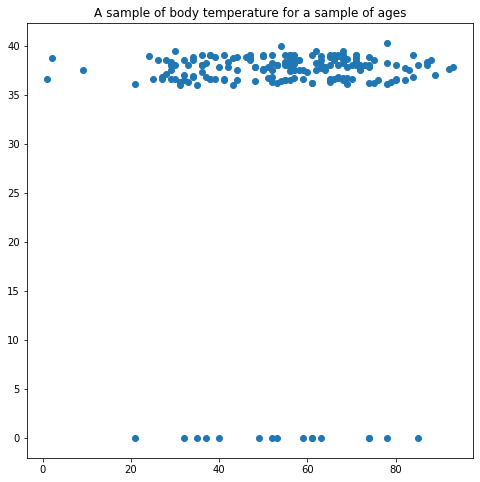

The sample of age 643     25
516     92
1478    37
897     68
1455     2
        ..
1054    56
1447    62
570     48
698     58
595     66
Name: Age, Length: 1368, dtype: int64


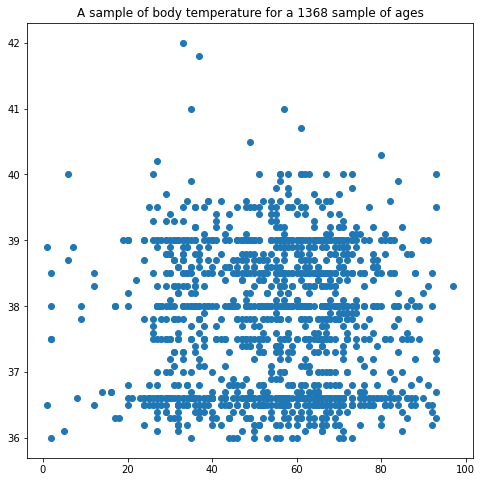

Error in callback <function flush_figures at 0x7fc5800211f0> (for post_execute):


KeyboardInterrupt: 

In [523]:
Bodytemperature=dataset2['Body temperature']
print(Bodytemperature)

#Drop NaN values
Bodytemperaturemasked=Bodytemperature.dropna()
Bodytemperaturemasked = Bodytemperaturemasked.drop(dataset2[Bodytemperature<30.0].index)

averagetemperature=statistics.mean(Bodytemperaturemasked)
print('The average body temperature of the dataset is',round(averagetemperature))

most_common_temperature=statistics.multimode(Bodytemperature)
print('The most common body temperature is',most_common_temperature)

count=Bodytemperaturemasked.count()
print('The new total of body temperature is', count)

#Replace NaN Values with Zeros 
Bodytemperaturezeros = Bodytemperature.fillna(0)

plt.figure(facecolor='white',figsize=(8,8))
plt.scatter(age_list,Bodytemperaturezeros)
plt.title("The body temperature for all ages")
plt.savefig('The body temperature for all ages.png')
plt.show()

BTSample = Bodytemperaturezeros.sample(200)
print('The sample of body temperature',BTSample)
AgeSample =age_list.sample(200)
print('The sample of age',AgeSample)
plt.figure(facecolor='white',figsize=(8,8))
plt.scatter(AgeSample,BTSample)
plt.title("A sample of body temperature for a sample of ages")
plt.show()

#This sample odoes not include body temperature values that are less than 30C and equal to zeros 
AgeSample2 =age_list.sample(1368)
print('The sample of age',AgeSample2)
plt.figure(facecolor='white',figsize=(8,8))
plt.scatter(AgeSample2,Bodytemperaturemasked)
plt.title("A sample of body temperature for a 1368 sample of ages")
plt.savefig('A sample of body temperature for a 1368 sample of ages.png')
plt.show()



sns.jointplot(x=age_list,y=Bodytemperaturezeros, kind="scatter", palette="rocket")

sns.jointplot(x=AgeSample2,y=Bodytemperaturemasked, kind="reg")



      Age  Body Temperature
1426   69              36.5
581    67              36.6
1376   43              37.5
295    17              38.5
963    50              37.2
...   ...               ...
975    40              36.6
237    56              38.0
1137   44              36.8
976    56              38.8
984    44              36.6

[1368 rows x 2 columns]
True
False


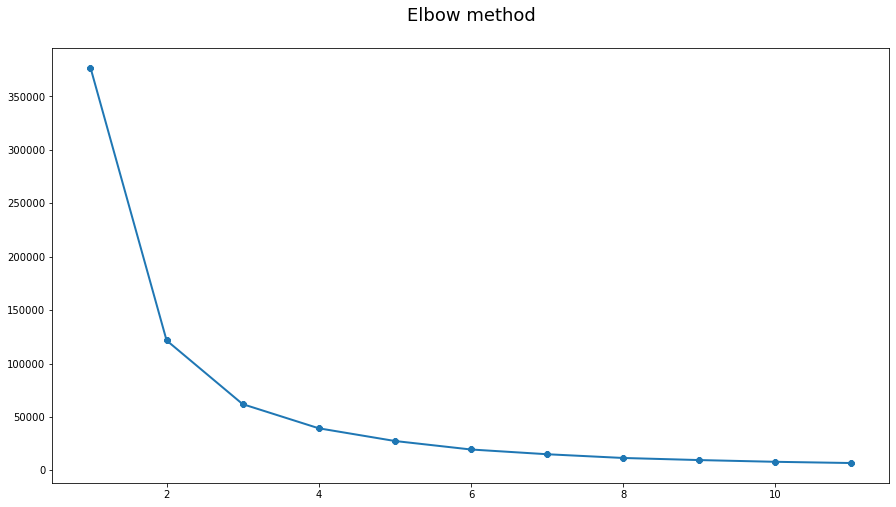

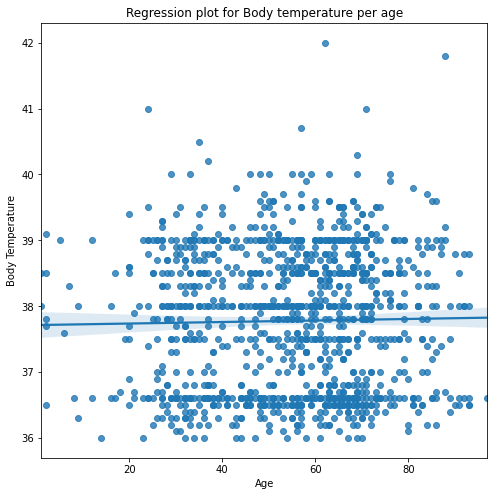

In [453]:
clusterdataframe=pd.DataFrame()
clusterdataframe['Age']= AgeSample2
clusterdataframe['Body Temperature']=Bodytemperaturemasked

print(clusterdataframe)

#check if values in dataframe are nan or infinity
y=np.any(np.isnan(clusterdataframe))
print(y)
cleaned_clusterdataframe=clusterdataframe.dropna()
x=np.any(np.isnan(cleaned_clusterdataframe))
print(x)

wcss = []
for k in range(1, 12):
    k_means = KMeans(n_clusters=k, init='k-means++')
    k_means.fit(cleaned_clusterdataframe)
    wcss.append(k_means.inertia_)
    
plt.figure(figsize=(15,8))

plt.plot(range(1, 12), wcss, linewidth=2, marker='8')
plt.title('Elbow method\n', fontsize=18)
plt.show()

plt.figure(facecolor='white',figsize=(8,8))
plt.title('Regression plot for Body temperature per age')

sns.regplot(x=cleaned_clusterdataframe['Age'], y=cleaned_clusterdataframe['Body Temperature'])
plt.savefig('Reg plot.png')

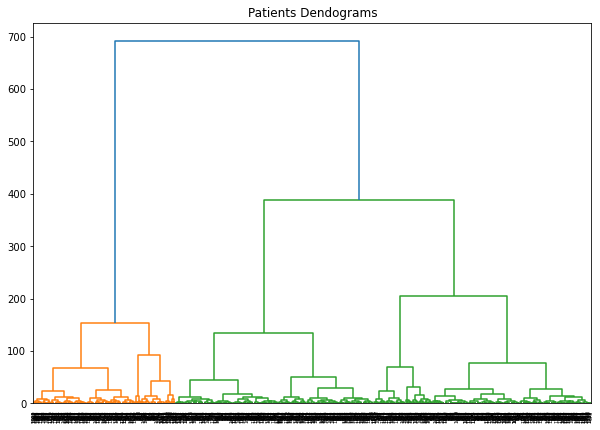

      Age  Body Temperature
1426   69              36.5
581    67              36.6
1376   43              37.5
295    17              38.5
963    50              37.2
...   ...               ...
975    40              36.6
237    56              38.0
1137   44              36.8
976    56              38.8
984    44              36.6

[1225 rows x 2 columns]


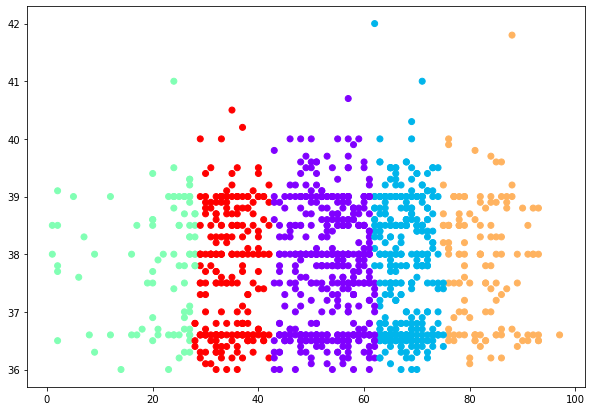

In [461]:
plt.figure(figsize=(10, 7))
plt.title("Patients Dendograms")
dend = shc.dendrogram(shc.linkage(cleaned_clusterdataframe, method='ward'))
plt.savefig('dendo.png')
plt.show()


print(cleaned_clusterdataframe)

#testing
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(cleaned_clusterdataframe)
plt.figure(figsize=(10, 7))
dt=cleaned_clusterdataframe.to_numpy()
plt.scatter(dt[:,0], dt[:,1], c=cluster.labels_, cmap='rainbow')
plt.savefig('cluster.png')
#plt.scatter(dt[0],dt[1], c=cluster.labels_, cmap='rainbow')

In [60]:
Bodytemperature=dataset2['Body temperature']
print(Bodytemperature)

means=dataset2.groupby('SARS-CoV-2 nucleic acids')['Body temperature'].mean()
print(means)


0       36.6
1       36.2
2       36.6
3        NaN
4        NaN
        ... 
1516     NaN
1517     NaN
1518     NaN
1519     NaN
1520     NaN
Name: Body temperature, Length: 1521, dtype: float64
SARS-CoV-2 nucleic acids
Negative    37.426415
Positive    37.979380
Name: Body temperature, dtype: float64


In [151]:
dataset3


,Patient,Age,Gender,SARS-CoV-2 nucleic acids,CT,Body temperature,Underlying diseases
0,864,40,Male,Positive,Positive,38.0,"Abnormal liver function, Hypertension, Diabete..."
1,98,35,Female,Positive,Positive,36.2,Acute lymphoblastic leukemia
2,1419,69,Male,Negative,Negative,39.0,Acute myeloid leukemia
3,1423,32,Female,Negative,Negative,38.0,Acute myeloid leukemia
4,1430,24,Male,Negative,Negative,40.0,Acute myeloid leukemia
...,...,...,...,...,...,...,...
1516,39,46,Female,Positive,Positive,37.8,Uterine fibroid
1517,459,67,Male,Positive,Positive,36.6,"Valvular heart disease, Lactic acidosis, Hyper..."
1518,626,56,Male,Negative,Positive,36.5,"Valvular heart disease, Sinus rhythm"
1519,482,72,Male,Positive,Positive,37.5,Vascular sclerosis


0       38.0
1       36.2
2       39.0
3       38.0
4       40.0
        ... 
1516    37.8
1517    36.6
1518    36.5
1519    37.5
1520    36.6
Name: Body temperature, Length: 1520, dtype: float64
SARS-CoV-2 nucleic acids
Negative    37.422329
Positive    37.984770
Name: Body temperature, dtype: float64
Number of patient with range of  36..36.5:  208
Number of patient with range of  37..37.5:  249
Number of patient with range of  38..38.5:  321
Number of patient with range of  39..39.5:  193
Number of patient with range of  40..40.5:  17
Number of patient with range of  41..41.5:  2
Number of patient with range of  42..42.5:  1


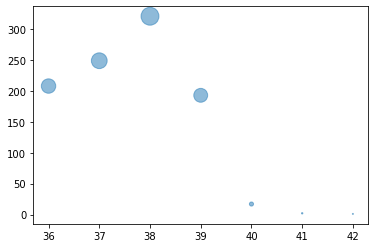

<Figure size 720x720 with 0 Axes>

In [384]:
meannegative = 37.4
meanpositive = 37.9

dataset3.drop(dataset3[dataset3['Body temperature'] < 30].index, inplace = True)
dataset_illness = dataset3['Body temperature']
print(dataset_illness)

means=dataset3.groupby('SARS-CoV-2 nucleic acids')['Body temperature'].mean()
print(means)

x=[36,37,38,39,40,41,42]

BT36 = dataset_illness[(dataset3['Body temperature'] >= 36 ) & (dataset3['Body temperature'] <= 36.5 ) ]
n1=BT36.count()
print('Number of patient with range of  36..36.5: ',n1)
BT37 = dataset_illness[(dataset3['Body temperature'] >= 37 ) & (dataset3['Body temperature'] <= 37.5 ) ]
n2=BT37.count()
print('Number of patient with range of  37..37.5: ',n2)
BT38 = dataset_illness[(dataset3['Body temperature'] >= 38 ) & (dataset3['Body temperature'] <= 38.5 ) ]
n3=BT38.count()
print('Number of patient with range of  38..38.5: ',n3)
BT39 = dataset_illness[(dataset3['Body temperature'] >= 39 ) & (dataset3['Body temperature'] <= 39.5 ) ]
n4=BT39.count()
print('Number of patient with range of  39..39.5: ',n4)
BT40 = dataset_illness[(dataset3['Body temperature'] >= 40 ) & (dataset3['Body temperature'] <= 40.5 ) ]
n5=BT40.count()
print('Number of patient with range of  40..40.5: ',n5)
BT41 = dataset_illness[(dataset3['Body temperature'] >= 41 ) & (dataset3['Body temperature'] <= 41.5 ) ]
n6=BT41.count()
print('Number of patient with range of  41..41.5: ',n6)
BT42 = dataset_illness[(dataset3['Body temperature'] >= 42 ) & (dataset3['Body temperature'] <= 42.5 ) ]
n7=BT42.count()
print('Number of patient with range of  42..42.5: ',n7)


y=[len(BT36.values),len(BT37.values),len(BT38.values),len(BT39.values),len(BT40.values),len(BT41.values),len(BT42.values)]

n= [n1,n2,n3,n4,n5,n6,n7]

Bubbledata = pd.DataFrame({
    'X': x,
    'Y': y,
    "bubble_size":n})
Bubbledata.head()

plt.scatter('X', 'Y', 
             s='bubble_size',
             alpha=0.5, 
             data=Bubbledata,
             cmap='rainbow')

plt.figure(figsize=(10,10))
plt.show()


## diseases

<AxesSubplot:title={'center':'Neurological Diseases'}>

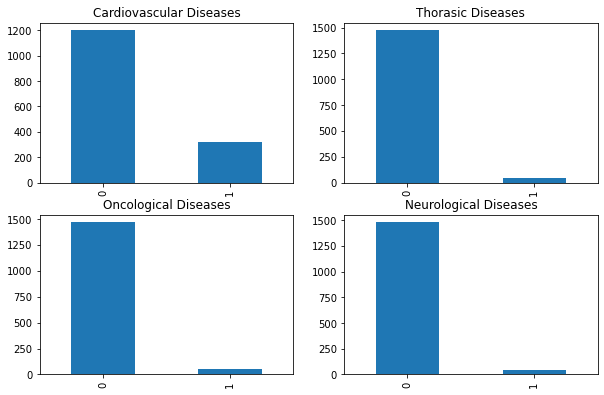

In [455]:
dataset_ill=pd.DataFrame()
dataset_ill['SARS-CoV-2 nucleic acids']= (dataset3['SARS-CoV-2 nucleic acids']=='Positive').astype(int)
dataset_ill['Body temperature'] = dataset3['Body temperature']
dataset_ill['Cardiovascular Diseases']=dataset['Cardiovascular Diseases'].astype(int)
dataset_ill['Thorasic Diseases'] =dataset['Thorasic Disorders'].astype(int)
dataset_ill['Oncological Diseases'] =dataset['Oncological Disorders'].astype(int)
dataset_ill['Neurological Diseases']=dataset['Neurological Disorders'].astype(int)
dataset_ill['Endocrinological Diseases']=dataset['Endocrinological Disorders'].astype(int)
fig = plt.figure(figsize=(10,10)) 
fig_dims = (3, 2)
plt.subplot2grid(fig_dims, (0, 0))
dataset_ill['Cardiovascular Diseases'].value_counts().plot(kind='bar', 
                                     title='Cardiovascular Diseases')
plt.subplot2grid(fig_dims, (0, 1))
dataset_ill['Thorasic Diseases'].value_counts().plot(kind='bar', 
                                     title='Thorasic Diseases')

plt.subplot2grid(fig_dims, (1, 0))
dataset_ill['Oncological Diseases'].value_counts().plot(kind='bar', 
                                     title='Oncological Diseases')

plt.subplot2grid(fig_dims, (1, 1))
dataset_ill['Neurological Diseases'].value_counts().plot(kind='bar', 
                                     title='Neurological Diseases')


In [489]:
for index in dataset_ill.index:
    if dataset_ill.loc[index,'SARS-CoV-2 nucleic acids'] == 'Positive':
        dataset_ill.loc[index,'SARS-CoV-2 nucleic acids'] = '1'
    if dataset_ill.loc[index,'SARS-CoV-2 nucleic acids'] =='Negative':
        dataset_ill.loc[index,'SARS-CoV-2 nucleic acids'] = '0'
dataset_ill.head()

test1 = dataset_ill[(dataset_ill['SARS-CoV-2 nucleic acids'] == 1 ) & (dataset_ill['Cardiovascular Diseases'] ==1 ) ]
ncardio=test1.count()
print('Number of patients with positive test and cardiovascular diseases are:',ncardio)

test2 = dataset_ill[(dataset_ill['SARS-CoV-2 nucleic acids'] == 1 ) & (dataset_ill['Thorasic Diseases'] ==1 ) ]
nthorasic=test2.count()
print('Number of patients with positive test and thorasic diseases are:',nthorasic)

test3 = dataset_ill[(dataset_ill['SARS-CoV-2 nucleic acids'] == 1 ) & (dataset_ill['Oncological Diseases'] ==1 ) ]
nonco=test3.count()
print('Number of patients with positive test and oncological diseases are:',nonco)

test4 = dataset_ill[(dataset_ill['SARS-CoV-2 nucleic acids'] == 1 ) & (dataset_ill['Neurological Diseases'] ==1 ) ]
nneuro=test4.count()
print('Number of patients with positive test and neurological diseases are:',nneuro)


test5 = dataset_ill[(dataset_ill['SARS-CoV-2 nucleic acids'] == 1 ) & (dataset_ill['Endocrinological Diseases'] ==1 ) ]
nendo=test5.count()
print('Number of patients with positive test and endocrinological Disorders diseases are:',nendo)


test6 = dataset_ill[(dataset_ill['SARS-CoV-2 nucleic acids'] == 1 ) & (dataset_ill['Endocrinological Diseases'] ==1 ) & (dataset_ill['Cardiovascular Diseases'] ==1 ) ]
ncardioendo=test6.count()
print('Number of patients with positive test and cardiovascular and endocrinological diseases are:',ncardioendo)


test7 = dataset_ill[(dataset_ill['SARS-CoV-2 nucleic acids'] == 1 ) & (dataset_ill['Cardiovascular Diseases'] ==1 )& (dataset_ill['Oncological Diseases'] ==1 )]
ncardioonco=test7.count()
print('Number of patients with positive test and cardiovascular and oncological diseases are:',ncardioonco)


test8 = dataset_ill[(dataset_ill['SARS-CoV-2 nucleic acids'] == 1 ) & (dataset_ill['Cardiovascular Diseases'] ==1 )& (dataset_ill['Neurological Diseases'] ==1 )]
ncardioneu=test8.count()
print('Number of patients with positive test and cardiovascular and neurological diseases are:',ncardioneu)

test9 = dataset_ill[(dataset_ill['SARS-CoV-2 nucleic acids'] == 1 ) & (dataset_ill['Oncological Diseases'] ==1 )& (dataset_ill['Endocrinological Diseases'] ==1 )]
noncoendo=test9.count()
print('Number of patients with positive test and oncological and endocrinological diseases are:',noncoendo)

Number of patients with positive test and cardiovascular diseases are: SARS-CoV-2 nucleic acids     194
Body temperature             194
Cardiovascular Diseases      194
Thorasic Diseases            194
Oncological Diseases         194
Neurological Diseases        194
Endocrinological Diseases    194
dtype: int64
Number of patients with positive test and thorasic diseases are: SARS-CoV-2 nucleic acids     30
Body temperature             30
Cardiovascular Diseases      30
Thorasic Diseases            30
Oncological Diseases         30
Neurological Diseases        30
Endocrinological Diseases    30
dtype: int64
Number of patients with positive test and oncological diseases are: SARS-CoV-2 nucleic acids     28
Body temperature             28
Cardiovascular Diseases      28
Thorasic Diseases            28
Oncological Diseases         28
Neurological Diseases        28
Endocrinological Diseases    28
dtype: int64
Number of patients with positive test and neurological diseases are: SARS-CoV-

In [459]:
Positivedata=pd.DataFrame()
Positivedata=dataset_ill[dataset_ill['SARS-CoV-2 nucleic acids'] == 1]
Positivedata

,SARS-CoV-2 nucleic acids,Body temperature,Cardiovascular Diseases,Thorasic Diseases,Oncological Diseases,Neurological Diseases,Endocrinological Diseases
0,1,38.0,0,0,0,0,0
1,1,36.2,0,0,0,0,0
15,1,36.4,0,0,0,0,0
18,1,38.5,0,0,0,0,1
20,1,39.9,0,0,0,0,0
...,...,...,...,...,...,...,...
1513,1,39.0,0,0,0,1,0
1515,1,40.5,0,0,0,0,0
1516,1,37.8,0,0,0,0,0
1517,1,36.6,0,0,0,0,0


In [474]:
positivetemperature=Positivedata['Body temperature']
averagetemperaturepositive=statistics.mean(positivetemperature)
print('The average body temperature of the dataset is',round(averagetemperaturepositive))

The average body temperature of the dataset is 38


In [464]:
#diseases_count=Positivedata[Positivedata['Cardiovascular Diseases'].value_counts().to_frame(),Positivedata['Thorasic Diseases'].value_counts().to_frame()]

cardioDiseases=Positivedata['Cardiovascular Diseases'].value_counts().to_frame()
print(cardioDiseases)
thorasicDiseases=Positivedata['Thorasic Diseases'].value_counts().to_frame()
print(thorasicDiseases)
oncoDiseases=Positivedata['Oncological Diseases'].value_counts().to_frame()
print(oncoDiseases)
neuroDiseases=Positivedata['Neurological Diseases'].value_counts().to_frame()
print(neuroDiseases)



   Cardiovascular Diseases
0                      699
1                      194
   Thorasic Diseases
0                863
1                 30
   Oncological Diseases
0                   865
1                    28
   Neurological Diseases
0                    874
1                     19


# Correlation for Positive dataset

In [466]:
Positivedata.corr(method ='pearson')

,SARS-CoV-2 nucleic acids,Body temperature,Cardiovascular Diseases,Thorasic Diseases,Oncological Diseases,Neurological Diseases,Endocrinological Diseases
SARS-CoV-2 nucleic acids,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Body temperature,NaN,1.000000,-0.071085,-0.007979,0.004157,0.048804,-0.053979
Cardiovascular Diseases,NaN,-0.071085,1.000000,-0.098224,-0.001291,0.035234,0.226269
Thorasic Diseases,NaN,-0.007979,-0.098224,1.000000,0.073439,-0.027490,-0.045113
Oncological Diseases,NaN,0.004157,-0.001291,0.073439,1.000000,0.018001,-0.042156
Neurological Diseases,NaN,0.048804,0.035234,-0.027490,0.018001,1.000000,0.073225
Endocrinological Diseases,NaN,-0.053979,0.226269,-0.045113,-0.042156,0.073225,1.000000


In [467]:
Positivedata.corr(method ='kendall')

,SARS-CoV-2 nucleic acids,Body temperature,Cardiovascular Diseases,Thorasic Diseases,Oncological Diseases,Neurological Diseases,Endocrinological Diseases
SARS-CoV-2 nucleic acids,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Body temperature,NaN,1.000000,-0.060368,-0.009892,0.009871,0.050023,-0.042692
Cardiovascular Diseases,NaN,-0.060368,1.000000,-0.098224,-0.001291,0.035234,0.226269
Thorasic Diseases,NaN,-0.009892,-0.098224,1.000000,0.073439,-0.027490,-0.045113
Oncological Diseases,NaN,0.009871,-0.001291,0.073439,1.000000,0.018001,-0.042156
Neurological Diseases,NaN,0.050023,0.035234,-0.027490,0.018001,1.000000,0.073225
Endocrinological Diseases,NaN,-0.042692,0.226269,-0.045113,-0.042156,0.073225,1.000000


In [469]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(Positivedata['Body temperature'], Positivedata['Cardiovascular Diseases'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.07108516246375451  with a P-value of P = 0.03367370671251162


In [470]:
pearson_coef, p_value = stats.pearsonr(Positivedata['Body temperature'], Positivedata['Thorasic Diseases'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.00797926287437796  with a P-value of P = 0.8117919315290025


In [471]:
pearson_coef, p_value = stats.pearsonr(Positivedata['Body temperature'], Positivedata['Oncological Diseases'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.004157211195686219  with a P-value of P = 0.9012702150632645


In [472]:
pearson_coef, p_value = stats.pearsonr(Positivedata['Body temperature'], Positivedata['Neurological Diseases'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.04880422370644642  with a P-value of P = 0.1450480972172276


In [473]:
pearson_coef, p_value = stats.pearsonr(Positivedata['Body temperature'], Positivedata['Endocrinological Diseases'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.053978907113693665  with a P-value of P = 0.10696774416005048


# Logistic Regression

In [541]:
dataset_ill

,SARS-CoV-2 nucleic acids,Body temperature,Cardiovascular Diseases,Thorasic Diseases,Oncological Diseases,Neurological Diseases,Endocrinological Diseases
0,1,38.0,0,0,0,0,0
1,1,36.2,0,0,0,0,0
2,0,39.0,0,0,1,0,0
3,0,38.0,1,0,0,0,0
4,0,40.0,0,0,0,0,0
...,...,...,...,...,...,...,...
1516,1,37.8,0,0,0,0,0
1517,1,36.6,0,0,0,0,0
1518,0,36.5,1,0,0,0,0
1519,1,37.5,0,0,0,0,0


In [542]:
#split dataset in features and target variable
feature_cols = ['Body temperature','Cardiovascular Diseases','Thorasic Diseases','Oncological Diseases','Neurological Diseases','Endocrinological Diseases']
X = dataset_ill[feature_cols]# Features
y = dataset_ill['SARS-CoV-2 nucleic acids'] # Target variable

In [543]:
#splitting data train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [545]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

### Model Evaluation using Confusion Matrix

In [547]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 76,  83],
       [ 43, 178]])

### ROC Curve

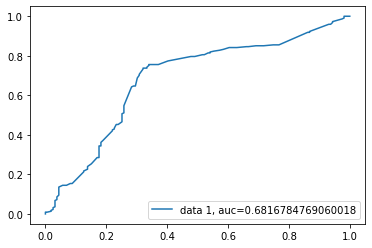

In [548]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Text(0.5, 257.44, 'Predicted label')

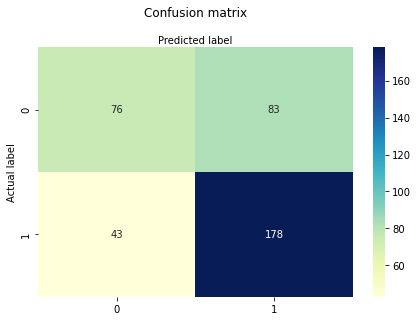

In [549]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [550]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6684210526315789
Precision: 0.6819923371647509
Recall: 0.8054298642533937


In [552]:
PatientX= [[39.0, 0, 0, 1, 0, 0]]
ynew = logreg.predict(PatientX)[0]
if ynew:
    print("PatientX has a positive SARS-CoV-2 nucleic acids test ")
else:
    print("PatientX has a negative SARS-CoV-2 nucleic acids test  ")

PatientX has a positive SARS-CoV-2 nucleic acids test 


In [553]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.675102
         Iterations 4
                             Results: Logit
Model:              Logit                    Pseudo R-squared: 0.004    
Dependent Variable: SARS-CoV-2 nucleic acids AIC:              2064.3095
Date:               2021-12-05 19:15         BIC:              2096.2683
No. Observations:   1520                     Log-Likelihood:   -1026.2  
Df Model:           5                        LL-Null:          -1030.2  
Df Residuals:       1514                     LLR p-value:      0.15256  
Converged:          1.0000                   Scale:            1.0000   
No. Iterations:     4.0000                                              
------------------------------------------------------------------------
                           Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
------------------------------------------------------------------------
Body temperature           0.0097   0.0016  5.8954 